# 머신러닝과 딥러닝을 활용한 비트코인 가격예측 데이터분석 보고서


### 요약
비트코인은 가상화폐 시장에서 중요한 역할을 하는 암호화폐입니다. 비트코인의 가격 예측은 투자자와 거래자에게 큰 관심을 받으며, 이를 위해 머신러닝과 딥러닝 모델을 활용한 분석이 진행되고 있습니다. 본 보고서에서는 단순 회귀 분석부터 복잡한 딥러닝 모델까지 다양한 방법을 사용하여 비트코인 가격 예측을 수행하고, 그 결과와 고려사항에 대해 제시합니다.

### 목차
1. [데이터 수집](#1-데이터-수집)
2. [탐색적 데이터 분석(EDA)](#2-탐색적-데이터-분석eda)
3. [모델 선택](#3-모델-선택)
4. [모델 평가](#4-모델-평가)
5. [결과 및 토의](#5-결과-및-토의)
6. [참고문헌](#6-참고문헌)
7. [결론](#7-결론)

1. 제목 및 요약
2. 서론
    - 연구의 목적과 배경 설명
    - 데이터 셋 설명
3. 데이터 수집 및 전처리
    - 사용된 데이터셋의 출처와 설명
    - 데이터의 특성과 구성요소에 대한 설명
    - 결측치, 이상치, 중복 등의 데이터 처리 방법 설명
    - 데이터 시각화를 통한 초기 EDA 결과
4. 분석
    - 특성 공학
        - 사용된 특성 및 변수 설명
        - 특성 선택 또는 추출 방법 설명
        - 특성 간 상관관계 분석 결과 제시
    - 모델 선택 및 구축
        - 사용된 머신러닝/딥러닝 알고리즘 설명
        - 선택 과정에 대한 이유
        - 모델 구조 및 파라미터 설정 설명
    - 학습 및 평가
        - 학습 데이터와 테스트 데이터 분할 방법 설명
        - 학습 및 평가 지표(r제곱, mse...)
        - 모델 학습 및 평가 결과
        - 성능 평가 및 개선점
5. 결과 및 토의
    - 예측 결과과 실제 값의 비교를 통한 모델 성능 평가
    - 모델의 장단점 및 개선 가능성 토의
    - 예측결과에 대한 해석 및 인사이트 도출
6. 결론
    - 연구 결과 요약, 결론
    - 모델 활용 가능성 및 미래 연구 방향 제시
7. 참고
8. 부록

비트코인은 시계열 데이터 중에서도 변동성이 심한 

## [1. 데이터 수집](###목차)

데이터 수집 과정에서는 수집한 데이터와 데이터의 특성을 빠르게 확인해보고, EDA 과정에서 주요 데이터에 대해 상세히 확인해보겠습니다.

##### S&P500 데이터 수집
- **수집기간:** 2013년 1월 1일부터 2023년 5월 1일까지(토요일, 일요일, 공휴일 제외)
- **데이터 항목:** 날짜(Date, 인덱스), 가격(Open, High, Low, Close, Adj Close), 거래량(Volume)

> [pandas-datareader 공식 문서](https://pandas-datareader.readthedocs.io/en/latest/index.html)

In [1]:
from pandas_datareader import data as pdr
import yfinance as yfin
from datetime import date, datetime

today = date.today()
date_today = today.strftime("%Y-%m-%d")
date_start = datetime(2013,1,1)

- S&P500 데이터(데이터프레임) 모양, 헤드 확인

In [7]:
# S&P500
yfin.pdr_override()

snp500name = 'S&P500'
snp500 = '^GSPC'
snp500_df = pdr.get_data_yahoo(snp500, start=date_start, end=date_today)

print(snp500_df.shape)
snp500_df.head()

[*********************100%***********************]  1 of 1 completed
(2615, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,1426.189941,1462.430054,1426.189941,1462.420044,1462.420044,4202600000
2013-01-03,1462.420044,1465.469971,1455.530029,1459.369995,1459.369995,3829730000
2013-01-04,1459.369995,1467.939941,1458.989990,1466.469971,1466.469971,3424290000
2013-01-07,1466.469971,1466.469971,1456.619995,1461.890015,1461.890015,3304970000
2013-01-08,1461.890015,1461.890015,1451.640015,1457.150024,1457.150024,3601600000


##### 비트코인 데이터 수집
- **수집기간:** ***2014년 9월 17일부터*** 2023년 5월 1일까지
- **데이터 항목:** 날짜(Date, 인덱스), 가격(Open, High, Low, Close, Adj Close), 거래량(Volume)

- BTC(KRW) 데이터(데이터프레임) 모양, 헤드 확인

In [8]:
# BTC(KRW)
yfin.pdr_override()

btc_krwname = 'Bitcoin(KRW)'
btc_krw = 'BTC-KRW'
btc_krw_df = pdr.get_data_yahoo(btc_krw, start=date_start, end=date_today)

print(btc_krw_df.shape)
btc_krw_df.head()

[*********************100%***********************]  1 of 1 completed
(3170, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,482611.81250,483811.03125,468121.03125,473203.50000,473203.50000,21787470960
2014-09-18,472713.03125,476276.53125,430991.40625,442818.25000,442818.25000,35976322560
2014-09-19,442466.65625,447515.40625,401278.37500,411989.34375,411989.34375,39571102935
2014-09-20,411861.00000,441730.53125,406862.40625,426711.75000,426711.75000,38469009780
2014-09-21,425857.09375,430387.15625,410304.03125,416189.65625,416189.65625,27737663355


- BTC(USD) 데이터(데이터프레임) 모양, 헤드, 테일 확인

In [9]:
# BTC(USD)
yfin.pdr_override()

btc_usdname = 'Bitcoin(USD)'
btc_usd = 'BTC-USD'
btc_usd_df = pdr.get_data_yahoo(btc_usd, start=date_start, end=date_today)

print(btc_usd_df.shape)
btc_usd_df.head()

[*********************100%***********************]  1 of 1 completed
(3170, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [10]:
btc_usd_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-18,27401.650391,27466.527344,26415.101562,26832.208984,26832.208984,15222938600
2023-05-19,26826.753906,27128.619141,26700.210938,26890.128906,26890.128906,11258983301
2023-05-20,26888.841797,27155.158203,26843.277344,27129.585938,27129.585938,7044911360
2023-05-21,27118.423828,27265.917969,26706.921875,26753.826172,26753.826172,8647416921
2023-05-22,26749.892578,27045.734375,26549.734375,26851.277344,26851.277344,11056770492


##### 외부요인 데이터 수집

1. 미국 국채 10년물 수익률(Treasury Yield 10 Years)
    - **수집기간:** 2013년 1월 1일부터 2023년 5월 1일까지(토요일, 일요일, 공휴일 제외)
    - **데이터 항목:** 날짜(Date, 인덱스), 가격(Open, High, Low, Close, Adj Close), 거래량(Volume)

---
2. *더 정교한 모델 생성을 위한 외부요인 데이터 수집은 [4. 모델선택](#4-모델-선택) 과정에서 수행합니다.*

- 미국 국채 10년물 수익률 데이터(데이터프레임) 모양, 헤드 확인

In [11]:
# 미국 국채 10년물 수익률
yfin.pdr_override()

tnxname = 'Treasury Yield 10 Years'
tnx = '^TNX'
tnx_df = pdr.get_data_yahoo(tnx, start=date_start, end=date_today)

print(tnx_df.shape)
tnx_df.head(5)

[*********************100%***********************]  1 of 1 completed
(2613, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,1.842,1.860,1.825,1.839,1.839,0
2013-01-03,1.844,1.911,1.835,1.899,1.899,0
2013-01-04,1.952,1.965,1.911,1.915,1.915,0
2013-01-07,1.904,1.917,1.892,1.903,1.903,0
2013-01-08,1.894,1.894,1.864,1.871,1.871,0


In [12]:
# 금 선물
yfin.pdr_override()

gldname = 'GOLD Future'
gld = 'GC=F'
gld_df = pdr.get_data_yahoo(gld, start=date_start, end=date_today)

print(gld_df.shape)
gld_df.head(5)

[*********************100%***********************]  1 of 1 completed
(2614, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,1672.800049,1693.800049,1670.000000,1687.900024,1687.900024,35
2013-01-03,1686.099976,1686.800049,1662.000000,1673.699951,1673.699951,140
2013-01-04,1647.000000,1658.300049,1625.699951,1648.099976,1648.099976,199
2013-01-07,1656.500000,1659.900024,1643.800049,1645.500000,1645.500000,49
2013-01-08,1647.699951,1661.500000,1647.699951,1661.500000,1661.500000,17


### 수집 데이터 확인: 개괄적으로

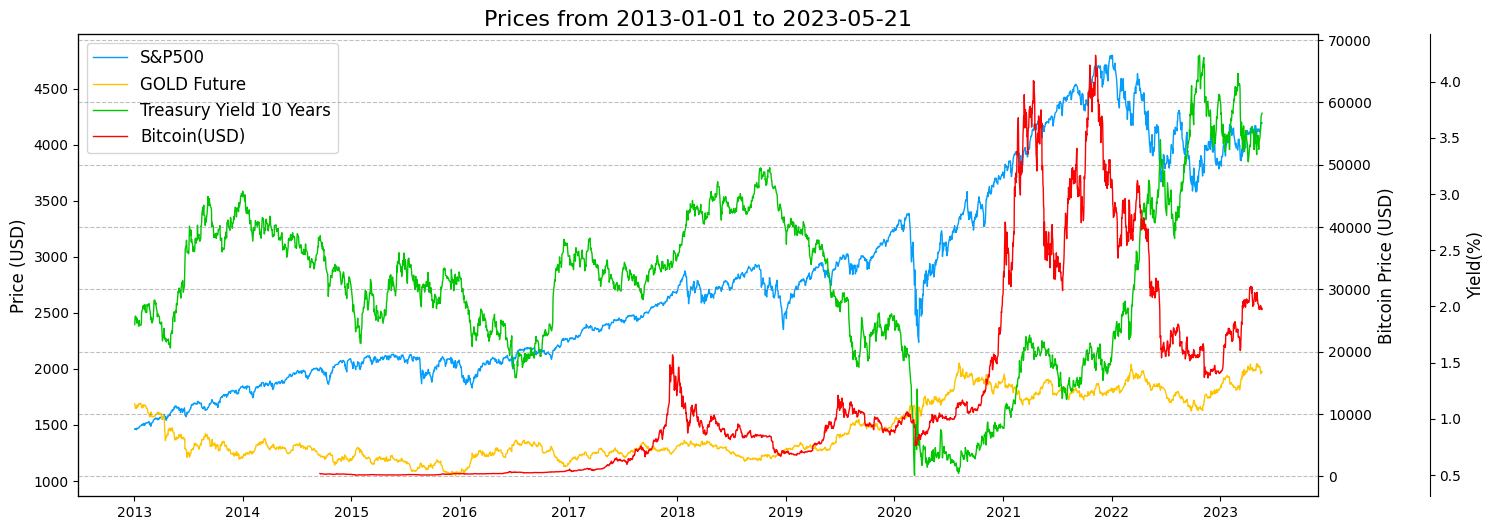

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

pd.plotting.register_matplotlib_converters()
years = mdates.YearLocator()
fig, ax1 = plt.subplots(figsize=(16, 6))
ax1.xaxis.set_major_locator(years)

# 첫 번째 데이터프레임 플로팅
x1 = snp500_df.index
y1 = snp500_df['Adj Close']
ax1.plot(y1, color='#039dfc', label=snp500name, linewidth=1.0)

# 두 번째 데이터프레임 플로팅
x2 = gld_df.index
y2 = gld_df['Adj Close']
ax1.plot(x2, y2, color='#ffc400', label=gldname, linewidth=1.0)

# 세 번째 데이터프레임 플로팅
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('outward', 80))  # 네 번째 데이터프레임의 축 위치 조정
x3 = tnx_df.index
y3 = tnx_df['Adj Close']
ax2.plot(y3, color='#01c703', label=tnxname, linewidth=1.0)

# 네 번째 데이터프레임 플로팅 (별도의 y축)
ax3 = ax1.twinx()
x4 = btc_usd_df.index
y4 = btc_usd_df['Adj Close']
ax3.plot(y4, color='#fc0303', label=btc_usdname, linewidth=1.0)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax1.legend(lines1 + lines2 + lines3, labels1 + labels2 + labels3, loc='upper left', fontsize=12, frameon=True, facecolor='white')

ax1.set_ylabel('Price (USD)', fontsize=12)
ax2.set_ylabel('Yield(%)', fontsize=12)
ax3.set_ylabel('Bitcoin Price (USD)', fontsize=12)

plt.grid(True, which='both', linestyle='--', color='gray', alpha=0.5)
plt.title('Prices from 2013-01-01 to 2023-05-21', fontsize=16)
plt.show()

- S&P500 Price와 GOLD Future(좌측)는 Bticoin Price(USD)(우측)에 비해 축소된 y축을 가지고 있으며, TNX Yield(우측 개별)는 수익률을 표시하고 있습니다.

#### 추세선(Trend)

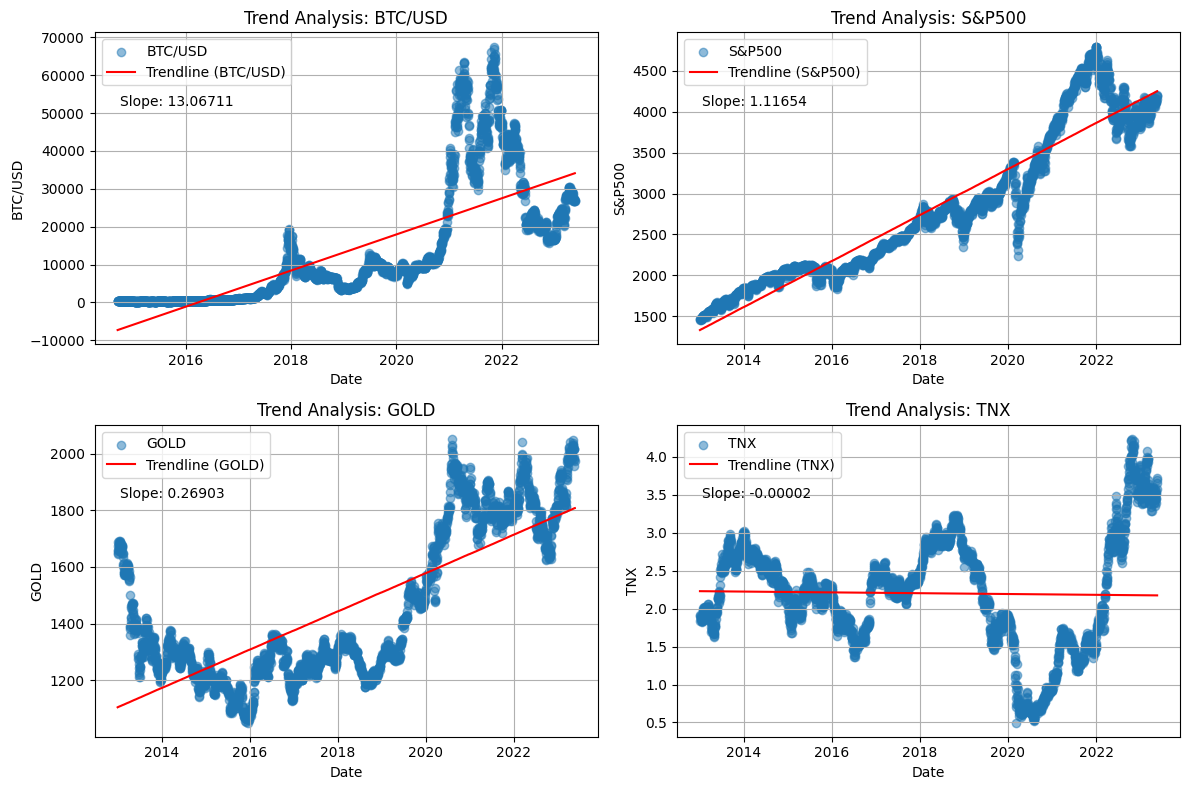

In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.dates as mdates

# 서브플롯 설정
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# BTC/USD 추세 시각화
axs[0, 0].scatter(btc_usd_df.index, btc_usd_df['Adj Close'], label='BTC/USD', alpha=0.5)
x_btc = np.arange(len(btc_usd_df.index)).reshape(-1, 1)
model_btc = LinearRegression()
model_btc.fit(x_btc, btc_usd_df['Adj Close'])
y_pred_btc = model_btc.predict(x_btc)
axs[0, 0].plot(btc_usd_df.index, y_pred_btc, color='red', label='Trendline (BTC/USD)')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('BTC/USD')
axs[0, 0].set_title('Trend Analysis: BTC/USD')
axs[0, 0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # x 축의 날짜 형식 지정
axs[0, 0].xaxis.set_major_locator(mdates.YearLocator(2))
axs[0, 0].legend()
axs[0, 0].grid(True)

# BTC/USD 추세 기울기 표시
slope_btc = model_btc.coef_[0]
slope_text_btc = f'Slope: {slope_btc:.5f}'
axs[0, 0].text(0.05, 0.8, slope_text_btc, transform=axs[0, 0].transAxes, verticalalignment='top')


# S&P500 추세 시각화
axs[0, 1].scatter(snp500_df.index, snp500_df['Adj Close'], label='S&P500', alpha=0.5)
x_snp = np.arange(len(snp500_df.index)).reshape(-1, 1)
model_snp = LinearRegression()
model_snp.fit(x_snp, snp500_df['Adj Close'])
y_pred_snp = model_snp.predict(x_snp)
axs[0, 1].plot(snp500_df.index, y_pred_snp, color='red', label='Trendline (S&P500)')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('S&P500')
axs[0, 1].set_title('Trend Analysis: S&P500')
axs[0, 1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # x 축의 날짜 형식 지정
axs[0, 1].xaxis.set_major_locator(mdates.YearLocator(2))
axs[0, 1].legend()
axs[0, 1].grid(True)

# S&P500 추세 기울기 표시
slope_snp = model_snp.coef_[0]
slope_text_snp = f'Slope: {slope_snp:.5f}'
axs[0, 1].text(0.05, 0.8, slope_text_snp, transform=axs[0, 1].transAxes, verticalalignment='top')


# GOLD 추세 시각화
axs[1, 0].scatter(gld_df.index, gld_df['Adj Close'], label='GOLD', alpha=0.5)
x_gld = np.arange(len(gld_df.index)).reshape(-1, 1)
model_gld = LinearRegression()
model_gld.fit(x_gld, gld_df['Adj Close'])
y_pred_gld = model_gld.predict(x_gld)
axs[1, 0].plot(gld_df.index, y_pred_gld, color='red', label='Trendline (GOLD)')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('GOLD')
axs[1, 0].set_title('Trend Analysis: GOLD')
axs[1, 0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # x 축의 날짜 형식 지정
axs[1, 0].xaxis.set_major_locator(mdates.YearLocator(2))
axs[1, 0].legend()
axs[1, 0].grid(True)

# GOLD 추세 기울기 표시
slope_gld = model_gld.coef_[0]
slope_text_gld = f'Slope: {slope_gld:.5f}'
axs[1, 0].text(0.05, 0.8, slope_text_gld, transform=axs[1, 0].transAxes, verticalalignment='top')


# TNX 추세 시각화
axs[1, 1].scatter(tnx_df.index, tnx_df['Adj Close'], label='TNX', alpha=0.5)
x_tnx = np.arange(len(tnx_df.index)).reshape(-1, 1)
model_tnx = LinearRegression()
model_tnx.fit(x_tnx, tnx_df['Adj Close'])
y_pred_tnx = model_tnx.predict(x_tnx)
axs[1, 1].plot(tnx_df.index, y_pred_tnx, color='red', label='Trendline (TNX)')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('TNX')
axs[1, 1].set_title('Trend Analysis: TNX')
axs[1, 1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # x 축의 날짜 형식 지정
axs[1, 1].xaxis.set_major_locator(mdates.YearLocator(2))
axs[1, 1].legend()
axs[1, 1].grid(True)

# TNX 추세 기울기 표시
slope_tnx = model_tnx.coef_[0]
slope_text_tnx = f'Slope: {slope_tnx:.5f}'
axs[1, 1].text(0.05, 0.8, slope_text_tnx, transform=axs[1, 1].transAxes, verticalalignment='top')


plt.tight_layout()
plt.show()

각 추세선의 기울기는 해당 데이터의 시간에 따른 경향성을 보여줍니다. 기울기는 선형 회귀 모델(`LinearRegression()`)을 사용하여 데이터포인트의 시간에 따른 변화를 가장 잘 표현하는 선을 채택하여 사용하였습니다.

> 기울기의 값이 양수인 경우, 해당 데이터의 추세는 시간이 지남에 따라 증가하는 경향을 보이고, 반대로 음수인 경우 감소하는 경향을 보입니다. 기울기가 0인 경우(또는 0에 가까운 경우)에는 데이터의 추세는 거의 변하지 않거나 상당히 불안정함을 나타냅니다.

- 비트코인(USD)의 경우, `13.07145`의 기울기를 가지는, 시간이 지남에 따라 증가하는 경향을 보이고 있습니다. 이는 `S&P500`, `Gold`, `TNX`에 비해 상당히 큰 기울기 값을 가지고 있으나, 큰 폭의 상승과 하락으로 생기는 추세선과의 넓은 간격은 변동성이 크고 불안정함으로 여겨질 수 있습니다. 이는 이후에 비트코인 데이터를 중심으로 다룰 때 살펴보겠습니다.

#### 계절성 박스플롯(Seasonality Boxplot)
- Box: 데이터의 25번째 백분위수(1사분위수, Q1)부터 75번째 백분위수(3사분위수, Q3)까지를 나타내는 박스(수평선은 중앙 값)
- 수염(Whiskers): 박스의 위와 아래에 있는 선분. 데이터의 전체 범위를 표현
- 이상치(Outliers): 수염범위를 벗어나는 개별 데이터 포인트

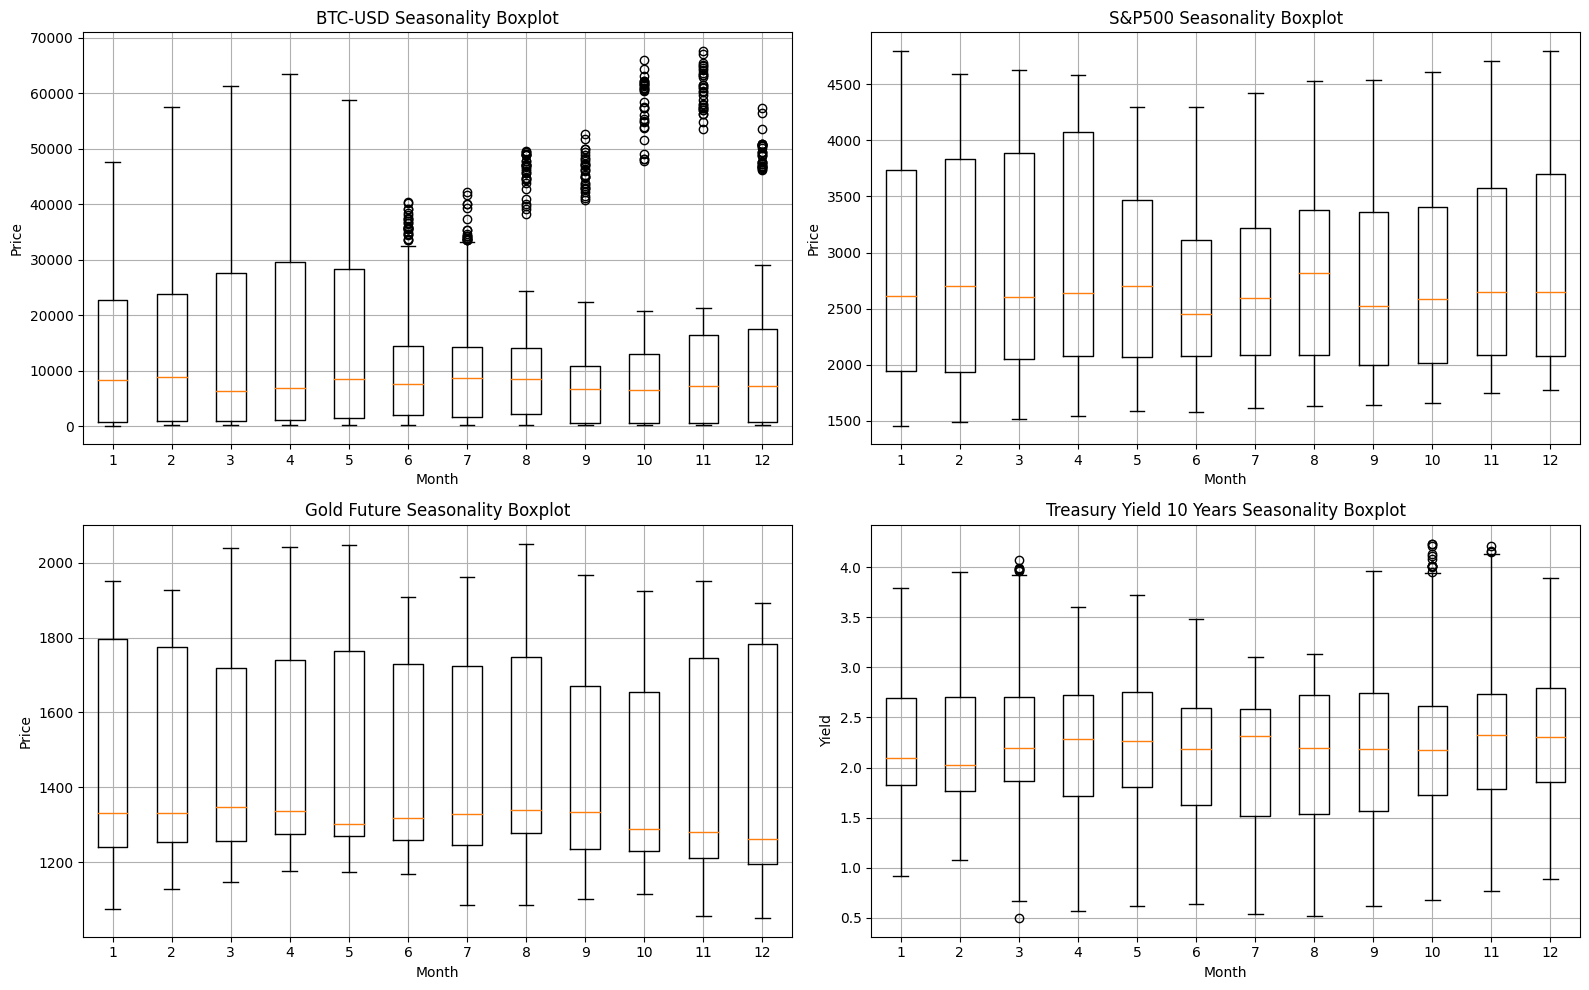

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터프레임에서 월 또는 분기 정보 추출
btc_usd_df['Month'] = btc_usd_df.index.month
snp500_df['Month'] = snp500_df.index.month
gld_df['Month'] = gld_df.index.month
tnx_df['Month'] = tnx_df.index.month

# 월별 또는 분기별 그룹화
grouped1 = btc_usd_df.groupby('Month')['Adj Close']
grouped2 = snp500_df.groupby('Month')['Adj Close']
grouped3 = gld_df.groupby('Month')['Adj Close']
grouped4 = tnx_df.groupby('Month')['Adj Close']

fig, axs = plt.subplots(2, 2, figsize=(16, 10))

data1 = [grouped1.get_group(month) for month in grouped1.groups]
data2 = [grouped2.get_group(month) for month in grouped2.groups]
data3 = [grouped3.get_group(month) for month in grouped3.groups]
data4 = [grouped4.get_group(month) for month in grouped4.groups]

axs[0, 0].boxplot(data1, labels=grouped1.groups.keys())
axs[0, 0].set_xlabel('Month')
axs[0, 0].set_ylabel('Price')
axs[0, 0].set_title('BTC-USD Seasonality Boxplot')
axs[0, 0].grid(True)

axs[0, 1].boxplot(data2, labels=grouped2.groups.keys())
axs[0, 1].set_xlabel('Month')
axs[0, 1].set_ylabel('Price')
axs[0, 1].set_title('S&P500 Seasonality Boxplot')
axs[0, 1].grid(True)

axs[1, 0].boxplot(data3, labels=grouped1.groups.keys())
axs[1, 0].set_xlabel('Month')
axs[1, 0].set_ylabel('Price')
axs[1, 0].set_title('Gold Future Seasonality Boxplot')
axs[1, 0].grid(True)

axs[1, 1].boxplot(data4, labels=grouped1.groups.keys())
axs[1, 1].set_xlabel('Month')
axs[1, 1].set_ylabel('Yield')
axs[1, 1].set_title('Treasury Yield 10 Years Seasonality Boxplot')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

BTC, 미국 국채 10년물 수익률에서 6월부터 12월까지 

#### 상관관계 히트맵

데이터 간 상관관계의 여부를 확인합니다. 시계열 데이터는 정규분포를 가지지 않을 수 있기 때문에 pearson 상관계수가 아닌 kendall 상관계수를 사용했습니다. 특히, bitcoin은 이상치가 잦게 발생하기 때문에 pearson 상관계수는 부정확한 분석 결과를 도출할 수 있습니다. kendall 상관계수는 데이터 자체가 아닌 순위를 우선 비교하므로 pearson의 단점을 보완할 수 있습니다.

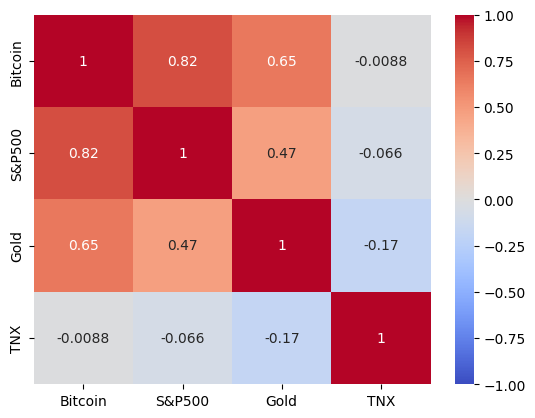

In [16]:
import seaborn as sns
# 세 데이터프레임을 하나의 데이터프레임으로 병합
merged_df = pd.concat([btc_usd_df['Adj Close'], snp500_df['Adj Close'], gld_df['Adj Close'], tnx_df['Adj Close']], axis=1)
merged_df.columns = ['Bitcoin', 'S&P500', 'Gold', 'TNX']

# 상관관계 행렬 생성
correlation_matrix = merged_df.corr(method='kendall')

# 히트맵 그리기
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1.0)
plt.show()

- S&P500과 Bitcoin(USD)의 상관계수는 0.82로, 매우 높은 상관관계를 가지고 있습니다.
- TNX(미국 국채 10년물 수익률)과 Bitcoin(USD)는 음의 상관관계를 가지고 있습니다.

## [2. 탐색적 데이터 분석(EDA)](###목차)

탐색적 데이터 분석(Exploratory Data Analysis, EDA)은 주어진 데이터를 탐색하고 이해하기 위해 다양한 분석 기법과 시각화 도구를 활용하는 과정입니다. EDA를 통해 데이터의 특성, 분포, 상관 관계 등을 파악하고 가설 설정 및 모델링에 도움을 줄 수 있습니다. 이제 주요 데이터인 BTC(KRW)의 탐색적 데이터 분석을 수행해보겠습니다.

### 2.1. 수집 데이터 확인: BTC-KRW를 중심으로

#### BTC-KRW 데이터 개요

In [17]:
print(btc_krw_df.shape)
print(btc_krw_df.info)
btc_krw_df.head()

(3170, 6)
<bound method DataFrame.info of                     Open          High           Low         Close   
Date                                                                 
2014-09-17  4.826118e+05  4.838110e+05  4.681210e+05  4.732035e+05  \
2014-09-18  4.727130e+05  4.762765e+05  4.309914e+05  4.428182e+05   
2014-09-19  4.424667e+05  4.475154e+05  4.012784e+05  4.119893e+05   
2014-09-20  4.118610e+05  4.417305e+05  4.068624e+05  4.267118e+05   
2014-09-21  4.258571e+05  4.303872e+05  4.103040e+05  4.161897e+05   
...                  ...           ...           ...           ...   
2023-05-18  3.630315e+07  3.662713e+07  3.558536e+07  3.657466e+07   
2023-05-19  3.657846e+07  3.670327e+07  3.529602e+07  3.582342e+07   
2023-05-20  3.581613e+07  3.599155e+07  3.542422e+07  3.563494e+07   
2023-05-21  3.563324e+07  3.598615e+07  3.557285e+07  3.595226e+07   
2023-05-22  3.593747e+07  3.613293e+07  3.539319e+07  3.545438e+07   

               Adj Close          Volume  
Date

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,482611.81250,483811.03125,468121.03125,473203.50000,473203.50000,21787470960
2014-09-18,472713.03125,476276.53125,430991.40625,442818.25000,442818.25000,35976322560
2014-09-19,442466.65625,447515.40625,401278.37500,411989.34375,411989.34375,39571102935
2014-09-20,411861.00000,441730.53125,406862.40625,426711.75000,426711.75000,38469009780
2014-09-21,425857.09375,430387.15625,410304.03125,416189.65625,416189.65625,27737663355


- index(`Date`): 날짜 인덱스 - 시계열 데이터
- `Open`: 시가
- `High`: 고가
- `Low`: 저가
- `Close`: 종가
- `Adj Close`: 조정 종가
- `Volume`: 거래량
- *`Month`: 인덱스에서 추출한 월*

#### 주요 통계량 및 분포 확인: 조정된 종가

BTC(KRW)의 주요 통계량과 가격 분포를 확인합니다. 

               Open          High           Low         Close     Adj Close   
count  3.170000e+03  3.170000e+03  3.170000e+03  3.170000e+03  3.170000e+03  \
mean   1.591254e+07  1.629594e+07  1.549709e+07  1.592144e+07  1.592144e+07   
std    1.894222e+07  1.940180e+07  1.842277e+07  1.893924e+07  1.893924e+07   
min    1.914468e+05  2.282608e+05  1.855481e+05  1.927520e+05  1.927520e+05   
25%    8.657024e+05  8.753118e+05  8.583263e+05  8.703984e+05  8.703984e+05   
50%    8.564201e+06  8.804861e+06  8.391948e+06  8.572062e+06  8.572062e+06   
75%    2.628712e+07  2.700833e+07  2.579259e+07  2.630564e+07  2.630564e+07   
max    8.111788e+07  8.103849e+07  7.826590e+07  8.113841e+07  8.113841e+07   

             Volume  
count  3.170000e+03  
mean   1.977897e+13  
std    2.316888e+13  
min    6.284822e+09  
25%    1.396025e+11  
50%    1.078759e+13  
75%    3.406779e+13  
max    3.947933e+14  


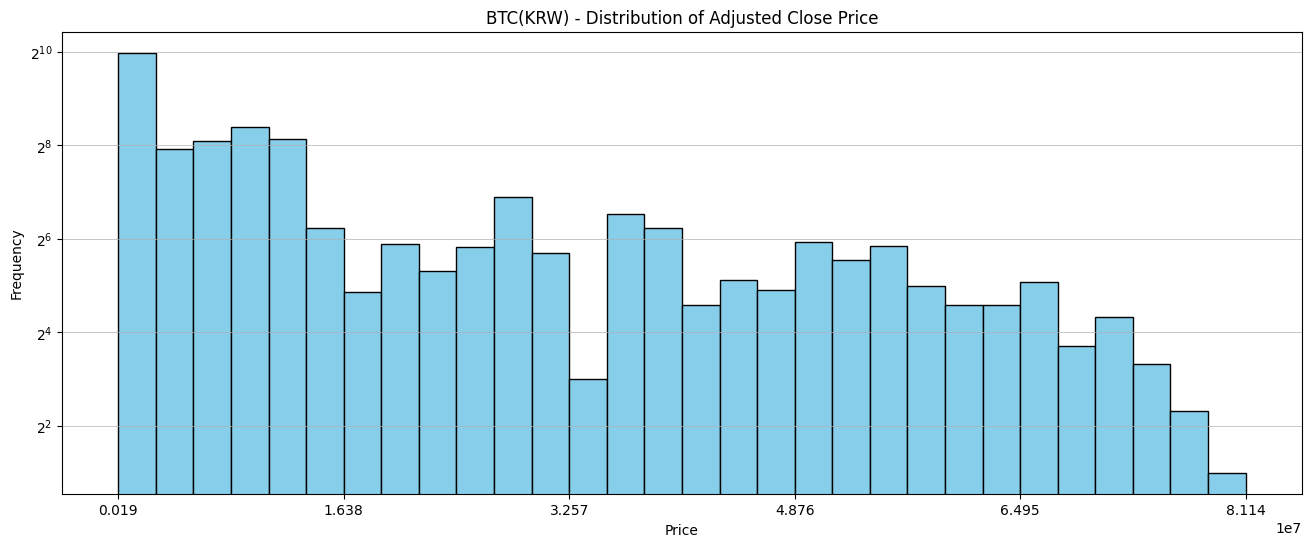

In [18]:
# 주요 통계량 및 분포 확인
print(btc_krw_df.describe())

plt.figure(figsize=(16, 6))
plt.hist(btc_krw_df['Adj Close'], bins=30, edgecolor='black', color='skyblue')
plt.title('BTC(KRW) - Distribution of Adjusted Close Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True, axis='y', linewidth=0.5)

plt.yscale('log', base=2)
x_ticks = np.linspace(btc_krw_df['Adj Close'].min(), btc_krw_df['Adj Close'].max(), 6)
plt.xticks(x_ticks)

plt.show()

- 위 기술통계량을 확인해보면 비어있는 값이 없음을 알 수 있습니다.
- 표준편차(`std`)가 매우 크므로, 평균으로부터 멀리 퍼져 있음(변동폭이 큼)을 알 수 있습니다.

- 조정 종가의 가격분포는 특정 가격에서 큰 편차를 보이므로, 빈도(Y 축)를 밑2의 로그 스케일로 적용.
- 조정 종가의 최저가는 190,000원대, 최고가는 81,140,000원대로, 190,000원대에서 16,380,000원대에서 2^8이상 빈도가 있음을 확인할 수 있습니다.

위 기술통계량은 아래 요소분해분석과정에서 더 자세히 알아보겠습니다.

#### n차 함수 추세선 그래프

`btc_krw_df` 데이터에 대해 n차 함수 추세선을 표시해 데이터의 국부적인 패턴을 파악해봅니다.

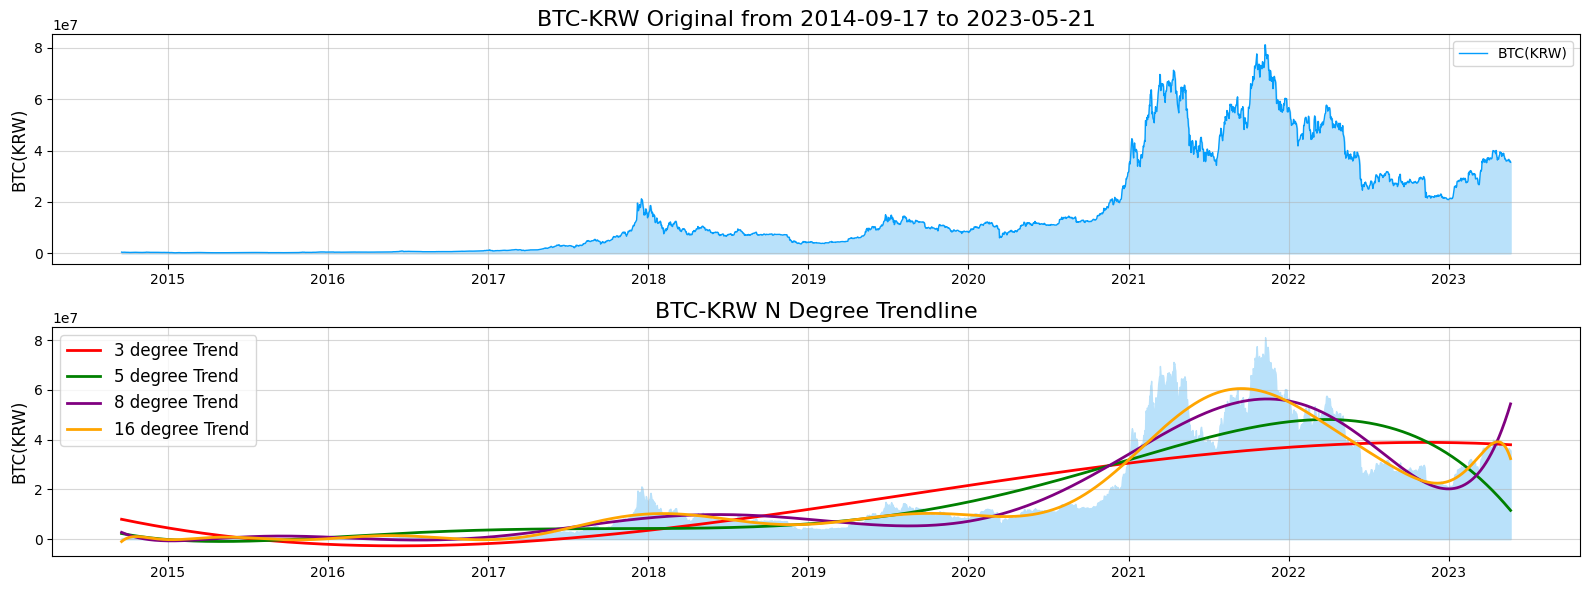

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

pd.plotting.register_matplotlib_converters()
years = mdates.YearLocator()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 6))
ax1.xaxis.set_major_locator(years)
ax2.xaxis.set_major_locator(years)

x = btc_krw_df.index
y = btc_krw_df['Adj Close']
ax1.legend(['BTC-KRW'], fontsize=12)
ax1.set_title('BTC-KRW Original from 2014-09-17 to 2023-05-21', fontsize=16)
ax1.plot(y, color='#039dfc', label='BTC(KRW)', linewidth=1.0)
ax1.fill_between(x, 0, y, color='#b9e1fa')
ax1.set_ylabel('BTC(KRW)', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.5)

ax2.set_title('BTC-KRW N Degree Trendline', fontsize=16)
ax2.set_ylabel('BTC(KRW)', fontsize=12)
ax2.fill_between(x, 0, y, color='#b9e1fa')

# 3차 함수 적합
poly_degree = 3
poly_coeff = np.polyfit(np.arange(len(y)), y, poly_degree)
poly_func = np.poly1d(poly_coeff)
poly_y = poly_func(np.arange(len(y)))
ax2.plot(x, poly_y, color='red', label='3 degree Trend', linewidth=2.0)

# 5차 함수 적합
poly_degree = 5
poly_coeff = np.polyfit(np.arange(len(y)), y, poly_degree)
poly_func = np.poly1d(poly_coeff)
poly_y = poly_func(np.arange(len(y)))
ax2.plot(x, poly_y, color='green', label='5 degree Trend', linewidth=2.0)

# 8차 함수 적합
poly_degree = 8
poly_coeff = np.polyfit(np.arange(len(y)), y, poly_degree)
poly_func = np.poly1d(poly_coeff)
poly_y = poly_func(np.arange(len(y)))
ax2.plot(x, poly_y, color='purple', label='8 degree Trend', linewidth=2.0)

# 16차 함수 적합
poly_degree = 16
poly_coeff = np.polyfit(np.arange(len(y)), y, poly_degree)
poly_func = np.poly1d(poly_coeff)
poly_y = poly_func(np.arange(len(y)))
ax2.plot(x, poly_y, color='orange', label='16 degree Trend', linewidth=2.0)

ax2.legend(fontsize=12)
ax2.grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

### 볼린저밴드
데이터의 변동성을 평가하고 추세 전환을 감지하기 위해, 주가 분석에 사용되는 볼린저밴드를 적용해봅니다.

- 볼린저 추종매매, 반전 매매 참고: https://lifenlight.tistory.com/72

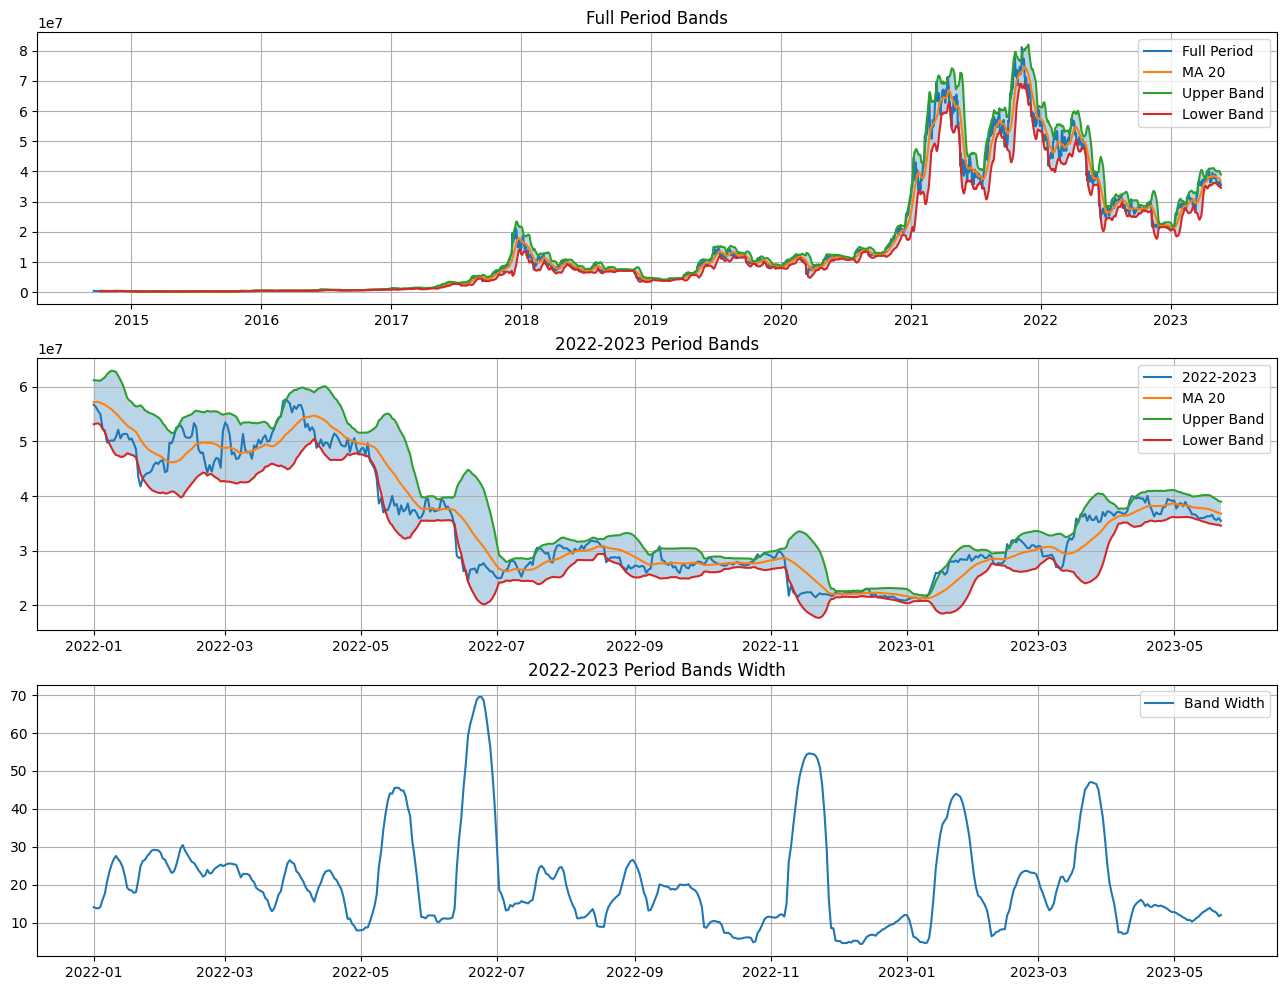

In [20]:
import matplotlib.pyplot as plt

# 이동평균 계산
moving_average = btc_krw_df['Adj Close'].rolling(window=20).mean()

# 이동평균의 표준편차 계산
std_dev = btc_krw_df['Adj Close'].rolling(window=20).std()

# 상단 밴드, 중간 밴드, 하단 밴드 계산
upper_band = moving_average + (2 * std_dev)
lower_band = moving_average - (2 * std_dev)

# 그래프 생성
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(16, 12), sharex=False)

# 전체 기간 데이터 플로팅
axs[0].set_title('Full Period Bands')
axs[0].plot(btc_krw_df.index, btc_krw_df['Adj Close'], label='Full Period')
axs[0].plot(moving_average.index, moving_average, label="MA 20")
axs[0].plot(upper_band.index, upper_band, label="Upper Band")
axs[0].plot(lower_band.index, lower_band, label="Lower Band")
axs[0].fill_between(btc_krw_df.index, lower_band, upper_band, alpha=0.3)
axs[0].legend()
axs[0].grid(True)

# 축소된 기간 데이터 플로팅
axs[1].set_title('2022-2023 Period Bands')
axs[1].plot(btc_krw_df.loc['2022':'2023'].index, btc_krw_df.loc['2022':'2023', 'Adj Close'], label='2022-2023')
axs[1].plot(moving_average.loc['2022':'2023'].index, moving_average.loc['2022':'2023'], label="MA 20")
axs[1].plot(upper_band.loc['2022':'2023'].index, upper_band.loc['2022':'2023'], label="Upper Band")
axs[1].plot(lower_band.loc['2022':'2023'].index, lower_band.loc['2022':'2023'], label="Lower Band")
axs[1].fill_between(btc_krw_df.loc['2022':'2023'].index, lower_band.loc['2022':'2023'], upper_band.loc['2022':'2023'], alpha=0.3)
axs[1].legend()
axs[1].grid(True)

# 축소된 기간 BandWidth 플로팅
axs[2].set_title('2022-2023 Period Bands Width')
axs[2].plot(btc_krw_df.loc['2022':'2023'].index, ((upper_band.loc['2022':'2023'] - lower_band.loc['2022':'2023']) / moving_average.loc['2022':'2023'] * 100), label='Band Width')
axs[2].legend()
axs[2].grid(True)

# 그래프 출력
plt.show()

### 2.2. 시계열 요소분해 분석(Time Series Decomposition Analysis)

#### 2.2.1 요소분해
요소분해분석은 주어진 시계열 데이터를 추세(Trend), 계절성(Seasonal), 잔차(Residual)의 세 가지 구성 요소로 분해하는 기법입니다. 이를 통해 데이터의 추세와 계절성 패턴을 파악할 수 있습니다.

다음 요소분해분석은 원계열 데이터에 대해 로그 변환된 데이터를 사용하므로, 데이터의 비선형성을 완화하고 변동성을 보다 안정적으로 만들어, 원본 데이터의 주기성을 쉽게 파악할 수 있습니다. 원계열 데이터는 시간이 지남에 따라 변동폭이 커지는 특성을 가지고 있기 때문에 곱셈분해(Multiplicative Decomposition)으로 성분을 분해하였습니다.

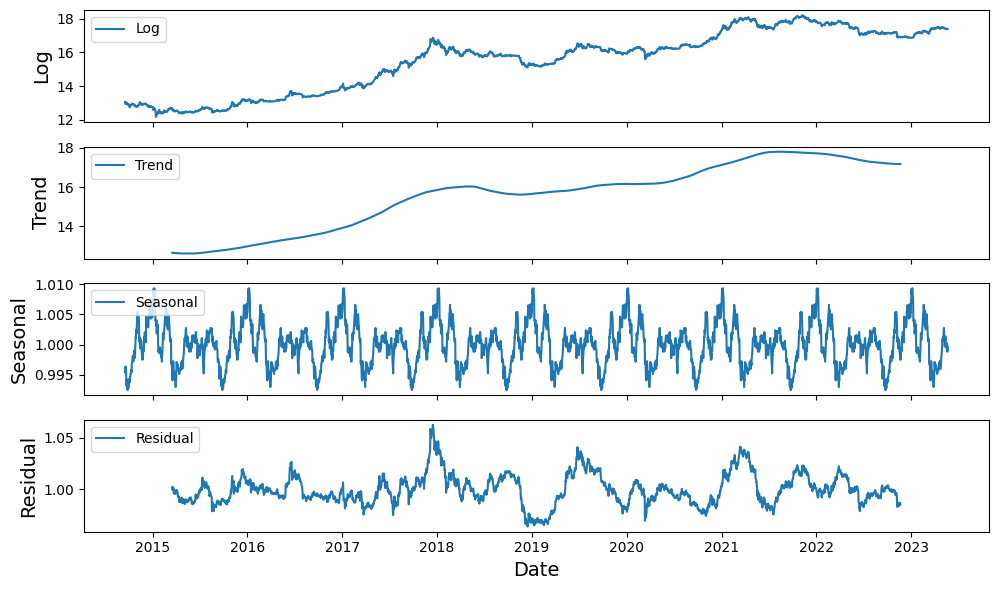

In [21]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

log_btc_krw_df = pd.DataFrame(np.log(btc_krw_df['Adj Close'])) # Original to Log Time Series

# 시계열 분해 수행
decomposition = sm.tsa.seasonal_decompose(log_btc_krw_df['Adj Close'], model='multiplicative', period=365)

# 서브플롯 설정
fig, axs = plt.subplots(4, 1, figsize=(10, 6), sharex=True)

# 원본 데이터
axs[0].plot(log_btc_krw_df.index, log_btc_krw_df['Adj Close'], label='Log')
axs[0].set_ylabel('Log', fontsize=14)
axs[0].legend(loc='upper left')

# 추세 구성 요소
axs[1].plot(log_btc_krw_df.index, decomposition.trend, label='Trend')
axs[1].set_ylabel('Trend', fontsize=14)
axs[1].legend(loc='upper left')

# 계절성 구성 요소
axs[2].plot(log_btc_krw_df.index, decomposition.seasonal, label='Seasonal')
axs[2].set_ylabel('Seasonal', fontsize=14)
axs[2].legend(loc='upper left')

# 잔차 구성(불규칙) 요소
axs[3].plot(log_btc_krw_df.index, decomposition.resid, label='Residual')
axs[3].set_xlabel('Date', fontsize=14)
axs[3].set_ylabel('Residual', fontsize=14)
axs[3].legend(loc='upper left')

# # x 축 범위 설정 (축소)
# xmin = pd.to_datetime('2022-05-20')
# xmax = btc_krw_df.index[-1]
# for ax in axs:
#     ax.set_xlim(xmin, xmax)

plt.tight_layout()
plt.show()

- 위 요소분해 분석의 주기성은 1년으로 설정하였습니다.
- **Log(원본;로그):** 윈계열에 비해 변동성 완화
- **Trend(추세성분):** 비선형적으로 증가
- **Seasonal(계절성분):** 설정된 주기(1년)에 따른 패턴 확인
- **Residual(잔차성분;불규칙):** 추세, 계절 성분을 뺀 불규칙 변동 패턴.

#### 2.2.2 장단기 주기 확인(Trend & Seasonal)

앞서 요소분해분석을 통해 원계열 데이터에 대해 로그, 추세, 계절, 잔차를 알아보았습니다. 이제 원계열 데이터에 대해 장단기 주기성을 확인하기 위해 위 데이터 수집과정 외부요인 데이터과 같이 확인해 보았던 전체 기간에 대한 선형회귀추세선(장기), 로그함수추세선과 월별 주기패턴(단기)을 확인해보겠습니다.

In [226]:
np.arange(len(month_data_daily.value)).reshape(-1,1)

AttributeError: 'Series' object has no attribute 'value'

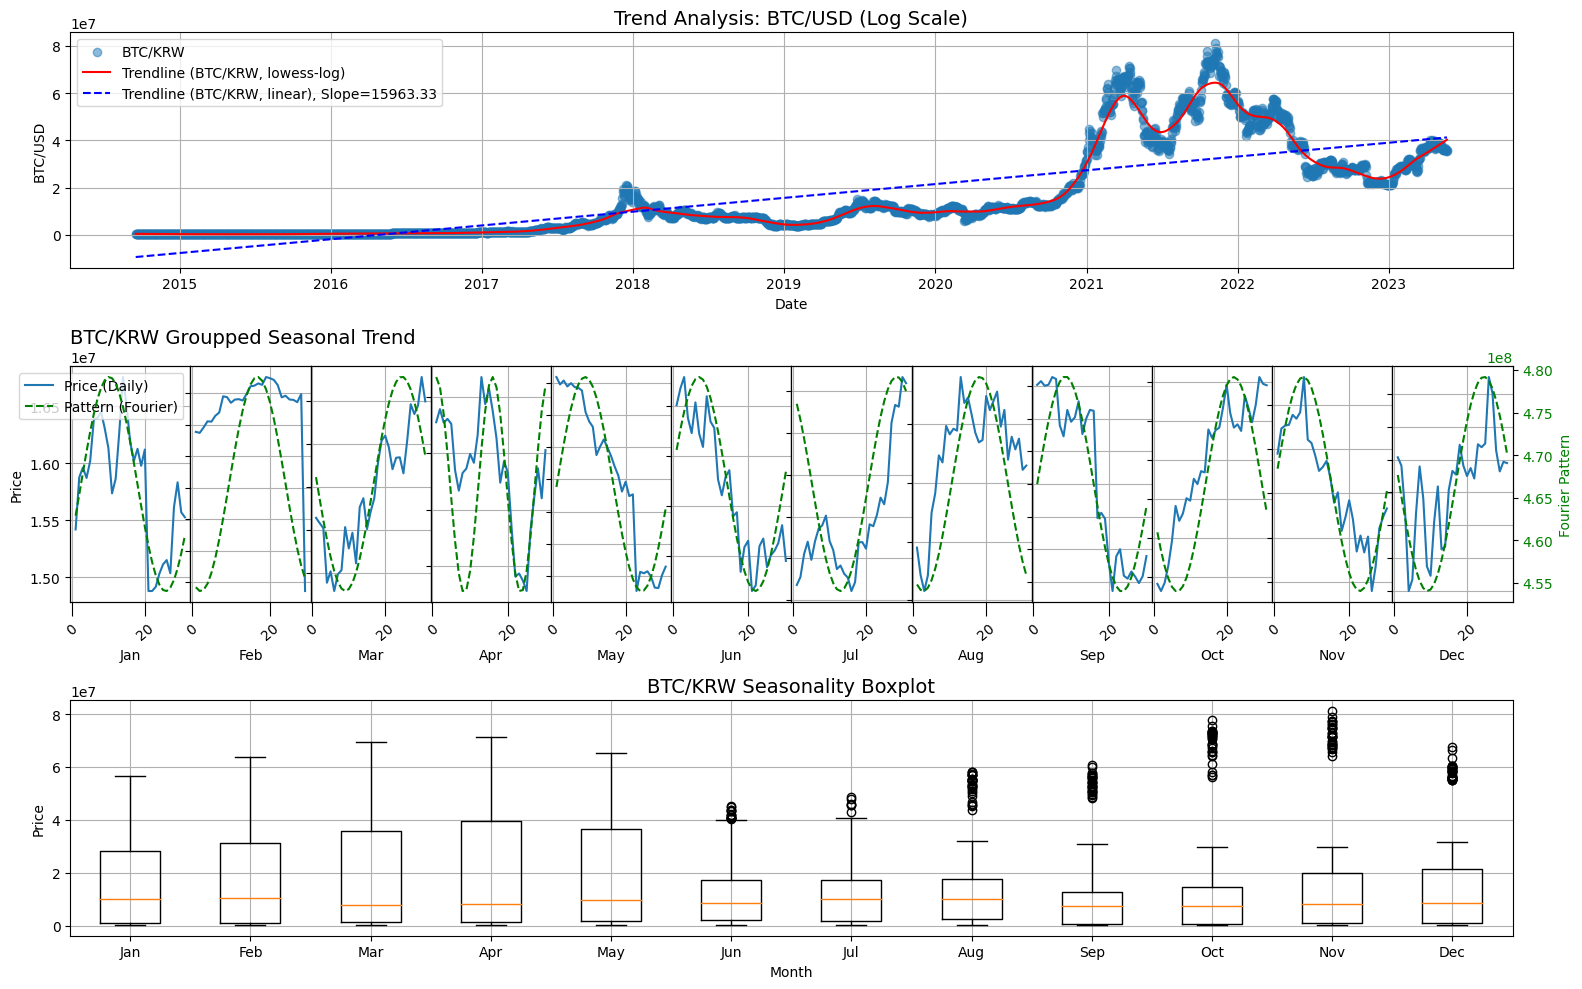

In [240]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy.fft import fft, fftfreq

# 서브플롯 설정
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 12)

# BTC/KRW 추세 시각화
ax0 = fig.add_subplot(gs[0, :])
ax0.scatter(btc_krw_df.index, btc_krw_df['Adj Close'], label='BTC/KRW', alpha=0.5)

# log 함수를 적용한 추세선 계산
log_prices = np.log(btc_krw_df['Adj Close'])
lowess_smoothed = lowess(log_prices, btc_krw_df.index, frac=0.05)
ax0.plot(btc_krw_df.index, np.exp(lowess_smoothed[:, 1]), color='red', label='Trendline (BTC/KRW, lowess-log)')

# 선형 회귀 추세선 계산
x = np.arange(len(btc_krw_df)).reshape(-1, 1)
y = btc_krw_df['Adj Close']
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
slope = model.coef_[0]
ax0.plot(btc_krw_df.index, y_pred, color='blue', linestyle='dashed', label=f'Trendline (BTC/KRW, linear), Slope={slope:.2f}')

ax0.set_xlabel('Date')
ax0.set_ylabel('BTC/USD')
ax0.set_title('Trend Analysis: BTC/USD (Log Scale)', fontsize=14)
ax0.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # x 축의 날짜 형식 지정
ax0.xaxis.set_major_locator(mdates.YearLocator(1))
ax0.legend(loc='upper left')
ax0.grid(True)

# BTC/KRW 연간, 월간, 일간 데이터 그룹화
btc_krw_df['Year'] = btc_krw_df.index.year
btc_krw_df['Month'] = btc_krw_df.index.month
btc_krw_df['Day'] = btc_krw_df.index.day

grouped_btc_krw_d = btc_krw_df.groupby([btc_krw_df.index.month, btc_krw_df.index.day])['Adj Close']
grouped_btc_krw_m = btc_krw_df.groupby('Month')['Adj Close']
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

month_data = pd.concat([grouped_btc_krw_d.get_group(month) for month in grouped_btc_krw_d.groups.keys()])
daily_data_mean = month_data.groupby([month_data.index.month, month_data.index.day]).mean() # 평균값으로
month_data_mean = grouped_btc_krw_m.mean()

# BTC/KRW Groupped Seasonal Trend 시각화
for i, month in enumerate(range(1, 13)):
    ax = fig.add_subplot(gs[1, i])
    month_data_daily = daily_data_mean[daily_data_mean.index.get_level_values(0) == month]
    month_data_monthly = month_data_mean[month_data_mean.index == month]

    log_d = np.log(month_data_daily.values)
    line0 = ax.plot(month_data_daily.index.get_level_values(1), np.exp(log_d), label='Price (Daily)')

    # Fourier 변환을 사용하여 일간 추세 패턴 계산
    fft_vals = fft(month_data_daily.values)
    fft_freq = fftfreq(len(month_data_daily))
    fft_amplitudes = np.abs(fft_vals)

    # 상위 주파수 성분을 추출하여 패턴으로 변환
    n_harmonics = 3  # 상위 주파수 성분의 개수
    top_harmonics = np.argsort(fft_amplitudes)[::-1][:n_harmonics]  # 주파수 성분의 인덱스
    trend_pattern = np.zeros_like(month_data_daily)
    for harmonic in top_harmonics:
        amplitude = fft_amplitudes[harmonic]
        phase = np.angle(fft_vals[harmonic])
        trend_pattern += amplitude * np.cos(2 * np.pi * fft_freq[harmonic] * np.arange(len(month_data_daily)) + phase)

    # 별도의 y축 추가: Fourier 변환 패턴
    ax_twin2 = ax.twinx()
    ax_twin2.set_ylabel('Fourier Pattern', color='green')
    line1 = ax_twin2.plot(month_data_daily.index.get_level_values(1), trend_pattern, color='green', linestyle='dashed', label='Pattern (Fourier)')
    ax_twin2.tick_params(axis='y', labelcolor='green')

    ax.tick_params(axis='x', rotation=40)
    ax.set_xlabel(months[i])
    ax.grid(True)

    if i == 0:
        ax.set_title('BTC/KRW Groupped Seasonal Trend', loc='left', fontsize=14)
        ax.set_ylabel('Price')
        # 범례 항목 생성
        lines = line0 + line1
        labels = [line.get_label() for line in lines]
        # 하나의 범례로 통합하여 추가
        ax.legend(lines, labels, loc='upper right')
    if i != 0:
        ax.yaxis.set_ticklabels([])
    if i != 11:
        ax_twin2.yaxis.set_ticklabels([])

gs.update(wspace=0)

# BTC/KRW Groupped Seasonal 시각화
ax2 = fig.add_subplot(gs[2, :])
boxplot_data = [grouped_btc_krw_m.get_group(month) for month in grouped_btc_krw_m.groups.keys()]
ax2.boxplot(boxplot_data, labels=months)
ax2.set_xlabel('Month')
ax2.set_ylabel('Price')
ax2.set_title('BTC/KRW Seasonality Boxplot', fontsize=14)
ax2.grid(True)

plt.tight_layout()
plt.show()

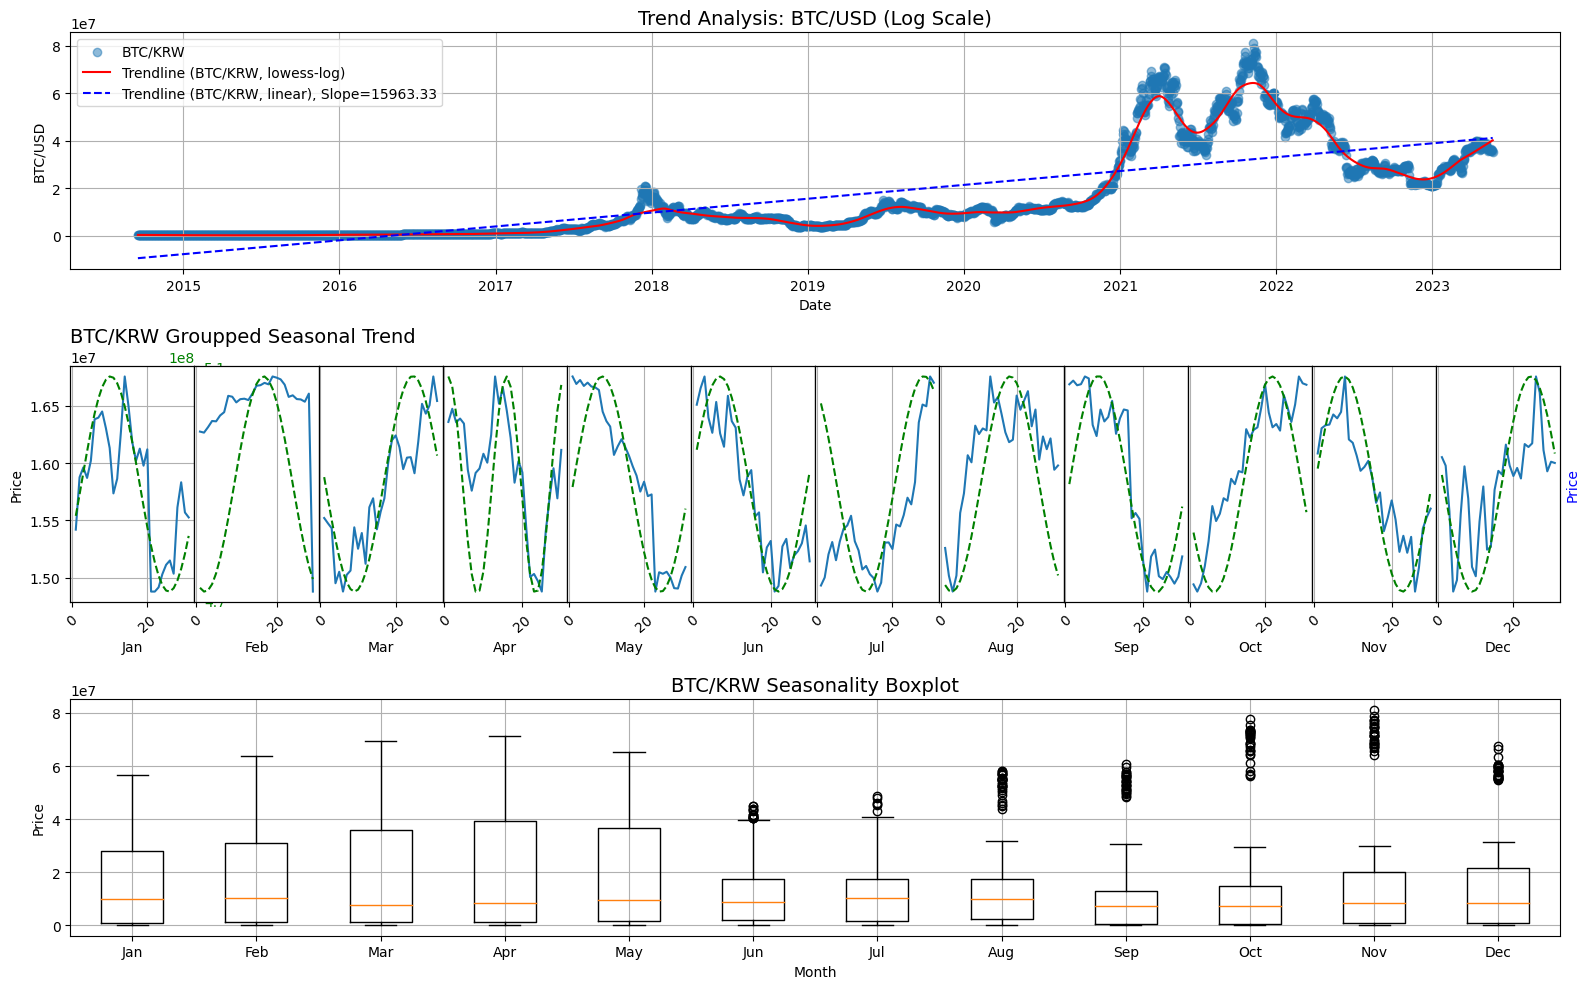

In [208]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy.fft import fft, fftfreq

# 서브플롯 설정
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 12)

# BTC/KRW 추세 시각화
ax0 = fig.add_subplot(gs[0, :])
ax0.scatter(btc_krw_df.index, btc_krw_df['Adj Close'], label='BTC/KRW', alpha=0.5)

# log 함수를 적용한 추세선 계산
log_prices = np.log(btc_krw_df['Adj Close'])
lowess_smoothed = lowess(log_prices, btc_krw_df.index, frac=0.05)
ax0.plot(btc_krw_df.index, np.exp(lowess_smoothed[:, 1]), color='red', label='Trendline (BTC/KRW, lowess-log)')

# 선형 회귀 추세선 계산
x = np.arange(len(btc_krw_df)).reshape(-1, 1)
y = btc_krw_df['Adj Close']
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
slope = model.coef_[0]
ax0.plot(btc_krw_df.index, y_pred, color='blue', linestyle='dashed', label=f'Trendline (BTC/KRW, linear), Slope={slope:.2f}')

ax0.set_xlabel('Date')
ax0.set_ylabel('BTC/USD')
ax0.set_title('Trend Analysis: BTC/USD (Log Scale)', fontsize=14)
ax0.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # x 축의 날짜 형식 지정
ax0.xaxis.set_major_locator(mdates.YearLocator(1))
ax0.legend(loc='upper left')
ax0.grid(True)

# BTC/KRW 연간, 월간, 일간 데이터 그룹화
btc_krw_df['Year'] = btc_krw_df.index.year
btc_krw_df['Month'] = btc_krw_df.index.month
btc_krw_df['Day'] = btc_krw_df.index.day

grouped_btc_krw_d = btc_krw_df.groupby([btc_krw_df.index.month, btc_krw_df.index.day])['Adj Close']
grouped_btc_krw_m = btc_krw_df.groupby('Month')['Adj Close']
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

month_data = pd.concat([grouped_btc_krw_d.get_group(month) for month in grouped_btc_krw_d.groups.keys()])
daily_data_mean = month_data.groupby([month_data.index.month, month_data.index.day]).mean() # 평균값으로
month_data_mean = grouped_btc_krw_m.mean()

# BTC/KRW Groupped Seasonal Trend 시각화
for i, month in enumerate(range(1, 13)):
    ax = fig.add_subplot(gs[1, i])
    month_data_daily = daily_data_mean[daily_data_mean.index.get_level_values(0) == month]
    month_data_monthly = month_data_mean[month_data_mean.index == month]
    line0 = ax.plot(month_data_daily.index.get_level_values(1), month_data_daily.values, label=f'{months[month-1]} (Daily)')

    # Fourier 변환을 사용하여 일간 추세 패턴 계산
    fft_vals = fft(month_data_daily.values)
    fft_freq = fftfreq(len(month_data_daily))
    fft_amplitudes = np.abs(fft_vals)

    # 상위 주파수 성분을 추출하여 패턴으로 변환
    n_harmonics = 3  # 상위 주파수 성분의 개수
    top_harmonics = np.argsort(fft_amplitudes)[::-1][:n_harmonics]  # 주파수 성분의 인덱스
    trend_pattern = np.zeros_like(month_data_daily)
    for harmonic in top_harmonics:
        amplitude = fft_amplitudes[harmonic]
        phase = np.angle(fft_vals[harmonic])
        trend_pattern += amplitude * np.cos(2 * np.pi * fft_freq[harmonic] * np.arange(len(month_data_daily)) + phase)

    # 별도의 y축 추가: Fourier 변환 패턴
    ax_twin2 = ax.twinx()
    ax_twin2.set_ylabel('Price', color='blue')
    line1 = ax_twin2.plot(month_data_daily.index.get_level_values(1), trend_pattern, color='green', linestyle='dashed', label='Pattern (Fourier)')
    ax_twin2.tick_params(axis='y', labelcolor='green')

    ax.yaxis.set_visible(True)
    ax.tick_params(axis='x', rotation=40)
    ax.set_xlabel(months[i])
    ax.set_ylabel('Price')
    ax.grid(True)

    if i == 0:
        ax.set_title('BTC/KRW Groupped Seasonal Trend', loc='left', fontsize=14)
    elif i > 0:
        ax.yaxis.set_visible(False)
        ax.set_yticks([])
        ax_twin2.set_yticks([])
    elif i == 11:
        # 범례 항목 생성
        lines = line0 + line1
        labels = [line.get_label() for line in lines]
        # 하나의 범례로 통합하여 추가
        ax.legend(lines, labels, loc='upper right')

gs.update(wspace=0)

# BTC/KRW Groupped Seasonal 시각화
ax2 = fig.add_subplot(gs[2, :])
boxplot_data = [grouped_btc_krw_m.get_group(month) for month in grouped_btc_krw_m.groups.keys()]
ax2.boxplot(boxplot_data, labels=months)
ax2.set_xlabel('Month')
ax2.set_ylabel('Price')
ax2.set_title('BTC/KRW Seasonality Boxplot', fontsize=14)
ax2.grid(True)

plt.tight_layout()
plt.show()

1. 장기 추세(Trend Analysis: BTC/KRW)
- 파란색으로 표시된 산점도(Scatter)는 실제 BTC/KRW 가격 데이터를 나타내며, 빨간색으로 표시된 Trendline은 Linear Regression 모델을 통해 예측된 추세를 나타냅니다.
- 선형회귀추세선의 기울기(Slope)는 15966.77로, 전체기간에 대해 매우 강한 상승 강도를 나타내고 있습니다.
- 빨간색으로 표시된 추세선은 ...변동폭이 넓은 시계열 데이터에 대한 추세 변환을 잘 보여줄 수 있는 로그함수 방식을 사용하였습니다. 이 추세선은 로그 변환값을 가지는 별도의 y축(우측)을 가지고 있습니다.

2. 단기 주기(Seasonality Boxplot: BTC/KRW)
- 각 박스플롯은 BTC/KRW 가격의 월별 분포 패턴을 나타냅니다.
- 각 박스의 중앙선은 중앙값(mean)을 나타내며, 박스는 가격의 중간 50% 범위를 표시합니다. 박스의 위 아래 경계는 25%와 75% 사분위수를 나타냅니다.
- 박스 바깥의 선(whisker)은 최댓값과 최솟값을 의미합니다.
- 박스 바깥의 점은 이상치(outlier)를 의미합니다. 6월 부터 12월 사이에서 이상치들을 확인할 수 있는데, 이는 6월 부터 12월 사이에 일반적인 가격 동향과는 독립적으로 상당한 변동이 있음을 의미합니다. 이러한 이상치는 뉴스, 정책, 금융 시장의 불안정성 등의 외부요인에 의해 발생할 수 있습니다.

### 2.3. 데이터 정상성 검정(통계적 가설 검정) 및 정상화(정규화) 처리

https://bluemumin.github.io/adp/2021/03/09/ADP-20%ED%9A%8C-ADP-%EC%8B%A4%EA%B8%B0-python-%ED%86%B5%EA%B3%84%EB%B6%84%EC%84%9D(%EC%8B%9C%EA%B3%84%EC%97%B4-%EC%A0%95%EC%83%81%EC%84%B1-%EA%B2%80%EC%A6%9D)/


데이터의 정상성(Stationarity)은 시계열 데이터 분석에서 중요한 개념입니다. 정상성은 데이터가 시간에 따라 평균, 분산 및 자기상관과 같은 특성이 일정하게 유지되는 것을 의미합니다.

정상성을 가지는 시계열 데이터는 시간에 관계없이 일정한 통계적 특성을 지님으로, 시계열 데이터 분석에서 안정적인 예측모델을 구축하는데 필요합니다. 반대로, 정상성을 가지지 않는 데이터는 시간의 추세, 계절성, 변동성 등이 존재하므로 모델링과 예측이 어렵게 됩니다.


본 연구에서는 1)평균 일정성 검정, 2)분산 일정성 검정, 3)자기상관 일정성 검정을 모두 수행하고 검정 결과에 따라 데이터가 정상성을 지니도록 처리하는 과정을 수행합니다.

#### 2.3.1 평균 일정성 검정
- ADF(Augmented Dickey-Fuller) 검정을 활용해 시계열 데이터가 정상성을 가지는지 여부를 확인합니다.

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 시계열 데이터 추출
btc_krw_series = btc_krw_df['Adj Close']

# ADF 검정 수행
adf_result = adfuller(btc_krw_series)

# 결과 출력
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'  {key}: {value}')

ADF Statistic: -1.5107243173104887
p-value: 0.5281996591889929
Critical Values:
  1%: -3.43243494922729
  5%: -2.8624612019435536
  10%: -2.5672603774676577


> ADF는 **귀무가설**(*`btc_krw_df[Adj Close]`는 단위근(비정상성)을 가진다.*)과 **대립가설**(*`btc_krw[Adj Close]`는 정상성을 가진다.*)을 가지고 이루어집니다.
> - **귀무가설:** 원계열은 안정적이지 않다(p-value > 0.05).
> - **대립가설:** 원계열은 안정적이다(p-value < 0.05).

- `p-value`가 `0.5281996591889929`로 유의수준 `0.05`보다 크기 때문에 <u>귀무가설을 기각할 수 없습니다.</u> 즉, `btc_krw_df[Adj Close]`는 단위근(비정상성)을 가집니다.
- `ADF Statistic`가 `-1.5107243173104887`이므로 임계값보다 크거나 작지 않으므로(절대값이 임계값보다 작지 않으므로) <u>귀무가설을 기각할 수 없습니다.</u>

> ***따라서, 시계열 데이터 `btc_krw_df['Adj Close']`는 정상성을 가지지 않는 시계열 데이터라고 할 수 있습니다.***

#### 2.3.2 분산 일정성 검정

- 이동평균(Moving Average) 그래프를 통해 데이터의 분산이 시간에 따라 일정한지를 확인합니다.
- 지수이동평균(Exponential Moving Average) 그래프(단기)를 통해 최근 데이터에 더 가중치를 부여한 평균선을 확인할 수 있습니다.
- 변동성(Velatility) 그래프를 통해 시간에 따른 데이터의 분산 정도(표준편차)를 확인합니다.
- LM(Lagrage Multiplier)(ARCH(Autoregressive Conditional Heteroscedasticity)모형에서 사용되는 검정 방법 중 하나로, 변동성의 일정성을 검증하는데 활용됨)검정을 통해 변동성의 일정성을 확인합니다.

C:\Users\creat\AppData\Local\Temp\ipykernel_14600\2516170534.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(gs[0, 0])


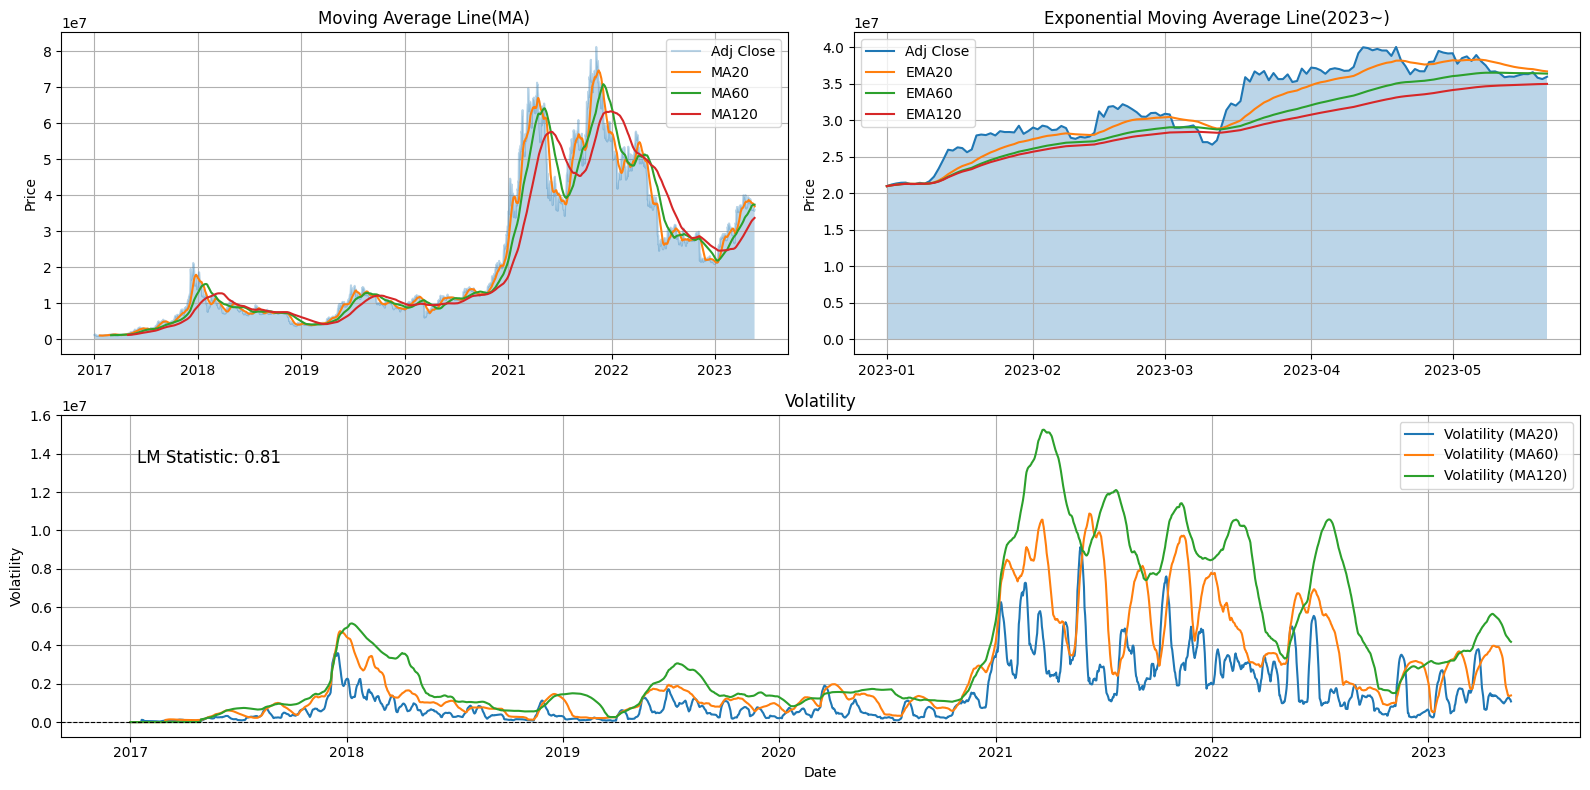

In [100]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import statsmodels.api as sm

# 그래프 생성
fig = plt.subplots(figsize=(16, 8))
gs = gridspec.GridSpec(2, 2, height_ratios=[3, 3])


# 첫 번째 subplot: 이동평균선
ax1 = plt.subplot(gs[0, 0])
ax1.plot(btc_krw_df['Adj Close'].loc['2017':], label='Adj Close', alpha=0.3)
ax1.plot(btc_krw_df['Adj Close'].loc['2017':].rolling(20).mean(), label='MA20')
ax1.plot(btc_krw_df['Adj Close'].loc['2017':].rolling(60).mean(), label='MA60')
ax1.plot(btc_krw_df['Adj Close'].loc['2017':].rolling(120).mean(), label='MA120')
ax1.fill_between(btc_krw_df.index[btc_krw_df.index >= '2017'], btc_krw_df['Adj Close'].loc['2017':], alpha=0.3)
ax1.set_ylabel('Price')
ax1.set_title('Moving Average Line(MA)')
ax1.legend()
ax1.grid(True)

# 두 번째 subplot: 지수이동평균선
ax2 = plt.subplot(gs[0, 1])
ax2.plot(btc_krw_df['Adj Close'].loc['2023':], label='Adj Close')
ax2.plot(btc_krw_df['Adj Close'].loc['2023':].ewm(span=20).mean(), label='EMA20')
ax2.plot(btc_krw_df['Adj Close'].loc['2023':].ewm(span=60).mean(), label='EMA60')
ax2.plot(btc_krw_df['Adj Close'].loc['2023':].ewm(span=120).mean(), label='EMA120')
ax2.fill_between(btc_krw_df.index[btc_krw_df.index >= '2023'], btc_krw_df['Adj Close'].loc['2023':], alpha=0.3)
ax2.set_ylabel('Price')
ax2.set_title('Exponential Moving Average Line(2023~)')
ax2.legend()
ax2.grid(True)

# 세 번째 subplot: 변동성
# 변동성 그래프에 발생할 수 있는 무한대 또는 결측 처리
volatility_ma20 = btc_krw_df['Adj Close'].loc['2017':].rolling(20).std().replace([np.inf, -np.inf], np.nan).fillna(0)
volatility_ma60 = btc_krw_df['Adj Close'].loc['2017':].rolling(60).std().replace([np.inf, -np.inf], np.nan).fillna(0)
volatility_ma120 = btc_krw_df['Adj Close'].loc['2017':].rolling(120).std().replace([np.inf, -np.inf], np.nan).fillna(0)

ax3 = plt.subplot(gs[1, :])
ax3.plot(volatility_ma20, label='Volatility (MA20)')
ax3.plot(volatility_ma60, label='Volatility (MA60)')
ax3.plot(volatility_ma120, label='Volatility (MA120)')
ax3.set_xlabel('Date')
ax3.set_ylabel('Volatility')
ax3.set_title('Volatility')
ax3.legend()
ax3.grid(True)

# LM 검정 통계량 계산
y = np.array(btc_krw_df['Adj Close'].loc['2017':])
X = sm.add_constant(np.column_stack((volatility_ma20, volatility_ma60, volatility_ma120)))
model = sm.OLS(y, X)
results = model.fit()
lm_statistic = results.rsquared

# LM 검정 통계량 출력
ax3.axhline(0, color='black', linestyle='--', linewidth=0.8)
ax3.annotate(f"LM Statistic: {lm_statistic:.2f}", xy=(0.05, 0.85), xycoords='axes fraction', fontsize=12)

# 그래프 출력
plt.tight_layout()
plt.show()

- 위 변동성그래프에서 각 이동평균(20일, 60일, 120일)의 표준편차를 확인할 수 있으며, 데이터의 분산이 일정하지 않고, 불안정도가 일정하게 유지되지 않음을 확인할 수 있습니다.

#### 2.3.3 자기상관 일정성 검정

자기상관은 시계열 데이터의 자기자신과 다른 시점 간의 상관관계를 의미합니다. 시차(lag)를 적용하여 각 시점과 그 이전 시점의 데이터 간의 상관관계를 계산합니다. 일반적으로 t 시점의 데이터와 t-1 시점의 데이터 간의 상관관계를 의미합니다.

ACF와 PACF는 일반적으로 ARIMA(AutoRegressive Integrated Moving Average) 모델의 파라미터 결정에 활용되지만, 본 프로젝트에서는 데이터 탐색(Exploratory Data Analysis, EDA)에 활용합니다.

> - **ACF(Autocorrelation Function; 자기상관 함수)**: ACF는 시계열 데이터의 시차에 따른 자기상관을 나타내는 함수입니다. ACF는 시차(lag)가 증가함에 따라 상관관계가 어떻게 변하는지를 보여줍니다. ACF는 정상(Stationary) 시계열 데이터에서 시차가 커질수록 0에 가까워지는 경향을 보입니다. 비정상(Non-stationary) 시계열 데이터의 ACF는 천천히 감소하거나 큰 값이 지속되는 경우가 있습니다. ACF를 통해 시계열 데이터의 주기성이나 추세성을 확인할 수 있습니다.
> - **PACF(Partial Autocorrelation Function; 부분 자기상관 함수)**: PACF는 시차가 다른 두 시계열 데이터 간의 순수한 상호 연관성을 나타냅니다. 즉, 현재 시점과 특정 시차의 시계열 데이터 간의 연관성을 측정하고자 할 때, 이전 시차의 영향을 제거한 상관계수입니다. PACF는 특정 시차 간의 순수한 상관성을 확인할 수 있으며, 다른 시차의 영향력은 제외됩니다. 일반적으로 PACF는 시차가 증가함에 따라 0으로 수렴하는 경향을 보입니다.

- y 축은 각각 ACF, PACF를 수치화 한 것입니다.
- x 축 시차(Lag)는 몇 개 전의 값에 대한 것인지를 의미합니다.

ACF와 PACF를 통해 시계열 데이터의 자기상관성을 시각화하고 분석함으로써, 시계열 데이터의 패턴과 특성을 파악할 수 있습니다. 자기상관 함수를 통해 시차에 따른 데이터 간의 상관관계를 확인하고, PACF를 통해 특정 시차의 영향력을 독립적으로 분석할 수 있습니다. 이를 통해 시계열 데이터의 자기상관 일정성을 검정하고, 예측 모델링이나 시계열 분석에 활용할 수 있습니다.

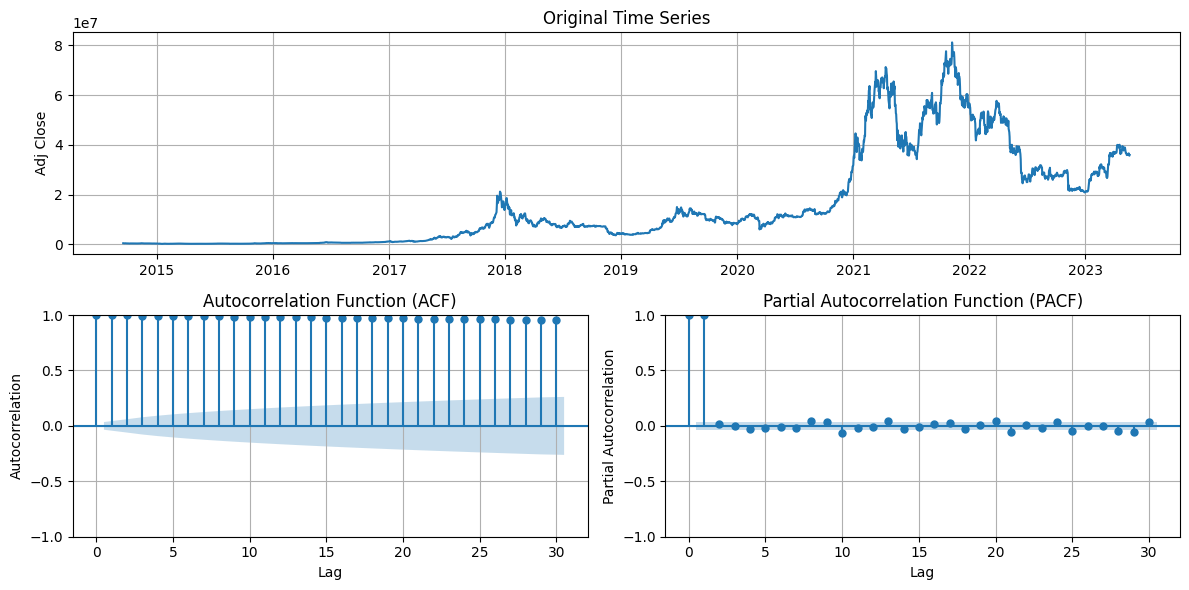

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 시각화
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(2, 2, height_ratios=[3, 3])

# 원본 시계열 데이터 플로팅
ax1 = plt.subplot(gs[0, :])
ax1.plot(btc_krw_df['Adj Close'])
ax1.set_ylabel('Adj Close')
ax1.set_title('Original Time Series')
ax1.grid(True)

# ACF 플롯
ax2 = plt.subplot(gs[1, 0])
plot_acf(btc_krw_df['Adj Close'], ax=ax2, lags=30)
ax2.set_xlabel('Lag')
ax2.set_ylabel('Autocorrelation')
ax2.set_title('Autocorrelation Function (ACF)')
ax2.grid(True)

# PACF 플롯
ax3 = plt.subplot(gs[1, 1])
plot_pacf(btc_krw_df['Adj Close'], ax=ax3, lags=30)
ax3.set_xlabel('Lag')
ax3.set_ylabel('Partial Autocorrelation')
ax3.set_title('Partial Autocorrelation Function (PACF)')
ax3.grid(True)

# 그래프 출력
plt.tight_layout()
plt.show()

- 원본 그래프(`btc_krw_series`)를 확인해보면 시간이 지남에 따라 값이 증가하는 추세를 보이지만, 변동성이 크다는 것을 확인할 수 있습니다.
- ACF 그래프를 보면 ***매우 천천히*** correlation이 내려가고 신뢰구간 안에 들어가지 못하는 모습(모두 유의미하지 않음)을 보이고 있습니다. 즉, 원계열은 안정적이지 않습니다.
- PACF 역시 편자기상관도가 1부터 시작(유의)해 급격히 줄어들어 0에 가까운 값을 나타내며 유의하지 않은 상관을 나타내고 있습니다. 이러한 패턴은 자기회귀 항의 차수를 나타냅니다.

#### 2.3.4. 데이터 정상화(Data Stationarization)

데이터 정상화(Data Stationarization)는 시계열 데이터를 정상성을 가지는 형태로 변환합니다. 정상성은 시계열 데이터의 평균과 분산이 시간에 따라 일정한 상태를 의미하며, 정상성을 가지는 데이터는 예측 및 분석에 용이합니다. 데이터 정상화는 시계열 데이터의 불규칙한 패턴을 분석하기 쉽게 만들어줍니다. 원본 데이터에 대해 로그 변환 후 차분을 수행하는 것은 데이터 정상화의 일반적인 방법 중 하나이지만, 원계열에 대한 상관도를 대폭 상실할 수도 있기 때문에 박스-콕스(Box-Cox) 변환 후 1차 차분으로 정상화를 수행합니다.

- 시계열 데이터 분석을 위한 근사적 정상화(Approximate Stationarization): 원본 데이터에 대해 박스-콕스(Box-Cox) 변환 후 1차 차분 수행
- 다변량 시계열 예측 개선을 위한 약정상화(Weakly Stationarization): 원본 데이터에 대해 분위수 정규화(Quantile Normalization)

- 근사적 정상화 수행 결과 확인

ADF Statistic: -16.787899022652002
p-value: 1.2488697070096548e-29
Critical Values:
  1%: -3.4324223949823685
  5%: -2.8624556569780975
  10%: -2.5672574254233744


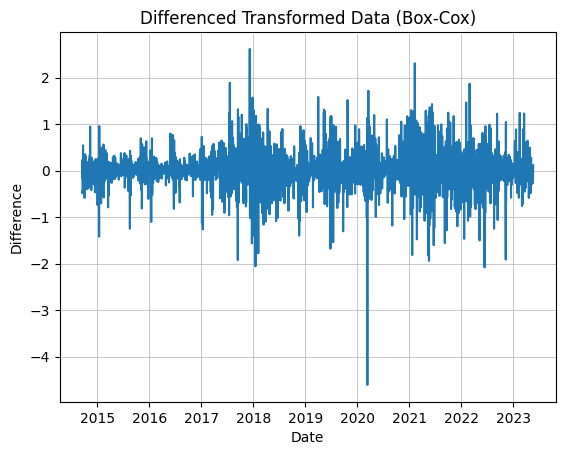

In [229]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import boxcox

# 박스-콕스 변환 수행
transformed_data, lambda_value = boxcox(btc_krw_df['Adj Close'])

# 변환된 데이터를 DataFrame으로 변환
transformed_df = pd.DataFrame(transformed_data, columns=['Adj Close'], index=btc_krw_df.index)
transformed_df['Lambda'] = lambda_value

# 1차 차분
diff_transformed_df = transformed_df['Adj Close'].diff(1)
diff_transformed_df.dropna(inplace=True)

# 시계열 데이터 추출
trfd_btc_krw_series = diff_transformed_df.values

# ADF 검정 수행
adf_result = adfuller(diff_transformed_df)

# 결과 출력
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'  {key}: {value}')

# diff_transformed_df['Adj Close'] 표시
plt.plot(diff_transformed_df.index, diff_transformed_df)
plt.title('Differenced Transformed Data (Box-Cox)')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.grid(True, linewidth=0.5)
plt.show()

근사적 정상화의 ADF 검정 결과를 보면, ADF 통계량은 -16.7879이고, p-value는 1.2489e-29입니다. 이는 매우 작은 p-value이므로 귀무가설을 기각하고 대립가설을 채택할 수 있습니다. 따라서, 데이터는 1% 유의수준에서도 정상성을 충족합니다.

ADF 통계량이 임계값(Critical)보다 더 낮으므로, 귀무가설을 기각할 수 있고 시계열 데이터가 정상성을 가진 것으로 판단할 수 있습니다.

따라서, 주어진 데이터는 정상성을 충족하므로 정상화된 데이터를 사용하여 모델을 생성하고 예측을 수행할 수 있습니다.

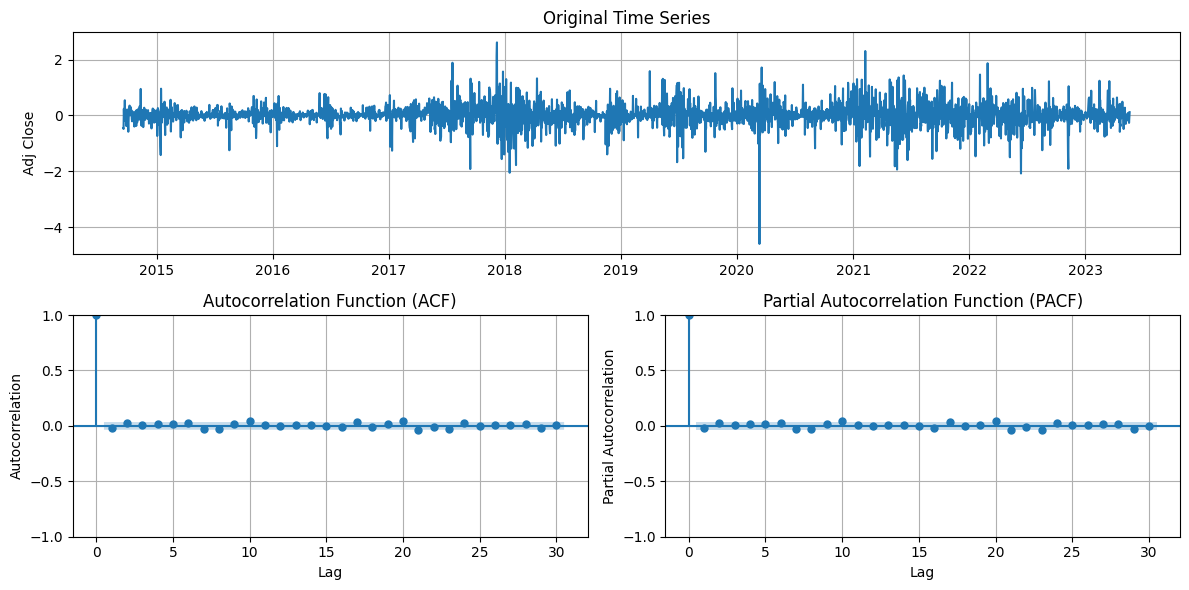

In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 시각화
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(2, 2, height_ratios=[3, 3])

# 원본 시계열 데이터 플로팅
ax1 = plt.subplot(gs[0, :])
ax1.plot(diff_transformed_df)
ax1.set_ylabel('Adj Close')
ax1.set_title('Original Time Series')
ax1.grid(True)

# ACF 플롯
ax2 = plt.subplot(gs[1, 0])
plot_acf(diff_transformed_df, ax=ax2, lags=30)
ax2.set_xlabel('Lag')
ax2.set_ylabel('Autocorrelation')
ax2.set_title('Autocorrelation Function (ACF)')
ax2.grid(True)

# PACF 플롯
ax3 = plt.subplot(gs[1, 1])
plot_pacf(diff_transformed_df, ax=ax3, lags=30)
ax3.set_xlabel('Lag')
ax3.set_ylabel('Partial Autocorrelation')
ax3.set_title('Partial Autocorrelation Function (PACF)')
ax3.grid(True)

# 그래프 출력
plt.tight_layout()
plt.show()

- 다변량 시계열 예측 개선을 위한 약정상화(Weakly Stationarization) 수행 결과 확인

다변량 시계열 예측 개선을 위한 약정상화 방법에는 원계열 데이터에 대해 분위수 정규화 이후 추세 또는 주기성(계절성)을 제거하는 방법이 있습니다. 분위수 정규화 이후 추세를 제거하는 방법을 선택할 경우, 원계열 데이터의 장기적인 경향성을 제거하고 잔차에 관심을 둠으로써, 주로 시간에 따른 잔차의 패턴과 상관관계를 모델링하고 예측에 활용할 수 있습니다. 반면, 분위수 정규화 이후 주기성을 제거하는 방법은 장기적인 경향성을 제거, 이상치를 완화하여 단기적인 패턴에 관심을 둠으로써, 주로 계절성 패턴이 예측 모델링에 방해가 되는 경우 사용됩니다. 이 방법으로 모델이 계절성에 의해 발생하는 변동성을 잘 처리할 수 있습니다.

그러나 다변량 시계열 예측에서는 계절성 패턴이 다른 변수들과의 상관관계를 나타내는 중요한 정보일 수 있습니다. 따라서 계절성을 제거하면서 다른 변수와의 관계를 잃어버리는 문제가 발생할 수 있기 때문에, 분위수 정규화 + 추세 제거 방법이 다변량 시계열 예측 모델에 더 적합한 약정상화 방법일 가능성이 있습니다.

본 프로젝트에서는 분위수 정규화 + 주기성 제거 방법 대신 분위수 정규화 + 추세 제거 방법으로 약정상화를 진행합니다. 한편, 분위수 정규화 + 주기성 제거 방법의 ADF 결과와 분위수 정규화 + 추세 제거 방법의 ADF 결과는 아래와 같습니다.

```python
# 분위수 정규화 + 주기성 제거 방법
ADF Statistic: -12.024191524789682
p-value: 2.975230554180101e-22
Critical Values:
  1%: -3.4324336205696255
  5%: -2.862460615102446
  10%: -2.567260065043355

# 분위수 정규화 + 추세 제거 방법
ADF Statistic: -10.062315097716665
p-value: 1.3235956207907157e-17
Critical Values:
  1%: -3.4324250254012925
  5%: -2.862456818784834
  10%: -2.567258043948983
```

ADF Statistic: -10.062315097716665
p-value: 1.3235956207907157e-17
Critical Values:
  1%: -3.4324250254012925
  5%: -2.862456818784834
  10%: -2.567258043948983


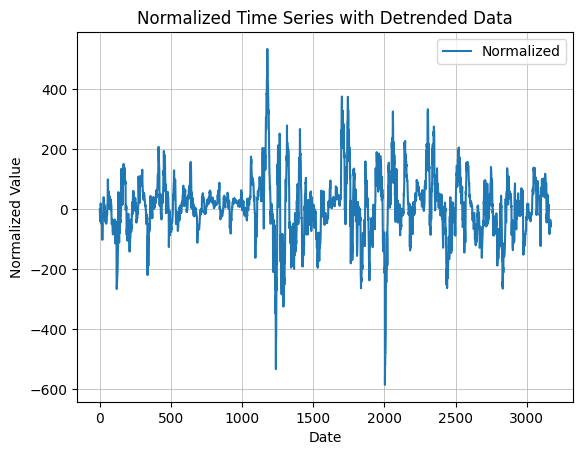

In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.stats import rankdata, norm

# 분위수 정규화 수행
normalized_data = rankdata(btc_krw_df['Adj Close']) / len(btc_krw_df)

# 추세 제거를 위한 이동평균 계산
window = 30  # 이동평균 윈도우 크기
rolling_mean = pd.Series(normalized_data).rolling(window=window, min_periods=1).mean()

# 추세 제거
detrended_data = normalized_data - rolling_mean

# 정규화된 데이터로 원계열 복원
restored_data = detrended_data * len(btc_krw_df)

# 시계열 데이터 추출
trfd_btc_krw_series = restored_data.values

# ADF 검정 수행
adf_result = adfuller(restored_data)

# 결과 출력
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'  {key}: {value}')

# 원본 데이터와 정규화된 데이터 플롯
plt.plot(restored_data.index, restored_data, label='Normalized')
plt.title('Normalized Time Series with Detrended Data')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid(True, linewidth=0.5)
plt.show()

**ADF 검정 결과:** 분위수 정규화 + 추세 제거 방법의 ADF 검정 결과 ADF Statistic 값이 -10.062315097716665로, 유의수준 1%에서의 임계값인 -3.4324250254012925보다 작습니다. 이는 귀무가설을 기각하고 해당 시계열 데이터가 정상 시계열로 해석 가능하다는 것을 나타냅니다. 반면, 분위수 정규화 + 계절성 제거 방법의 ADF Statistic 값은 -12.024191524789682로, 이 또한 귀무가설을 기각하고 정상 시계열로 해석 가능함을 보여줍니다. 따라서 두 방법 모두 정상화를 수행할 수 있지만, ADF 검정 결과로는 두 방법이 유사한 정도의 성능을 나타냅니다.

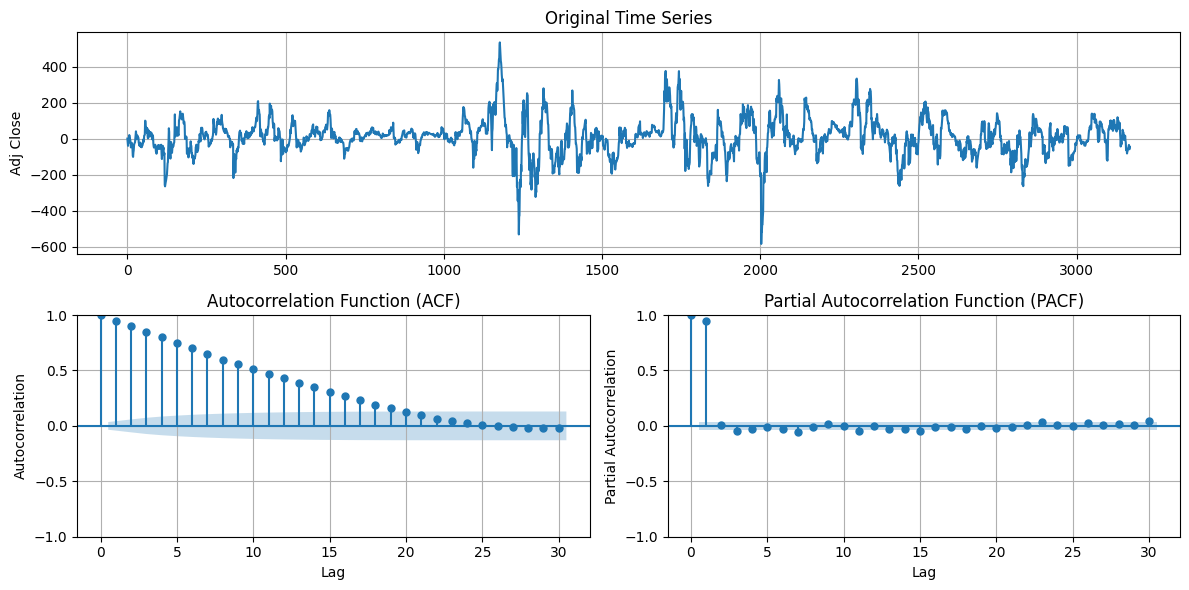

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 시각화
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(2, 2, height_ratios=[3, 3])

# 원본 시계열 데이터 플로팅
ax1 = plt.subplot(gs[0, :])
ax1.plot(restored_data)
ax1.set_ylabel('Adj Close')
ax1.set_title('Original Time Series')
ax1.grid(True)

# ACF 플롯
ax2 = plt.subplot(gs[1, 0])
plot_acf(restored_data, ax=ax2, lags=30)
ax2.set_xlabel('Lag')
ax2.set_ylabel('Autocorrelation')
ax2.set_title('Autocorrelation Function (ACF)')
ax2.grid(True)

# PACF 플롯
ax3 = plt.subplot(gs[1, 1])
plot_pacf(restored_data, ax=ax3, lags=30)
ax3.set_xlabel('Lag')
ax3.set_ylabel('Partial Autocorrelation')
ax3.set_title('Partial Autocorrelation Function (PACF)')
ax3.grid(True)

# 그래프 출력
plt.tight_layout()
plt.show()

약 정상화 이후 약한 자기 상관을 가지면서, 정상성을 지니게 되었습니다.
- ACF 그래프에서 시차가 증가함에 따라 자기상관도가 천천히 신뢰구간 안으로 들어오며, 0 주변을 오가는 형태를 보여줍니다.
- PACF 그래프에서 시차가 증가함에 따라 부분자기상관도는 지수적으로 감소하여 0 주변을 오가는 형태를 보여줍니다.

In [65]:
grouped_btc = btc_krw_df[['Adj Close', 'Month']].groupby('Month').mean().sort_values('Adj Close')
grouped_btc

,Adj Close
Month,
7,1.294579e+07
6,1.315440e+07
9,1.404079e+07
10,1.498540e+07
12,1.505230e+07
8,1.526907e+07
11,1.560495e+07
1,1.580348e+07
5,1.721464e+07


- `btc_krw_df`의 전체 데이터에 대해 월별 조정가(`Adj Close`)를 확인해보면, 7월이 가장 낮고 4월이 가장 높은 것을 확인할 수 있습니다.

In [31]:
pd.reset_option('display.float_format') # 부동소수점 방식 복원

In [36]:
btc_krw_df[btc_krw_df.columns.difference(['Month'])].corr() # `Month`는 제외

,Adj Close,Close,High,Low,Open,Volume
Adj Close,1.000000,1.000000,0.999488,0.999398,0.998858,0.704049
Close,1.000000,1.000000,0.999488,0.999398,0.998858,0.704049
High,0.999488,0.999488,1.000000,0.999038,0.999517,0.709544
Low,0.999398,0.999398,0.999038,1.000000,0.999161,0.697715
Open,0.998858,0.998858,0.999517,0.999161,1.000000,0.705528
Volume,0.704049,0.704049,0.709544,0.697715,0.705528,1.000000


## [3. 모델 선택](###목차)
### 1.단순 회귀 분석 모델
### 2.로지스틱 회귀 분석 모델
### 3.다향 회귀 분석 모델
### 4.LSTM 모델
### 5.Convolutional LSTM(Conv1D) 모델
### 6.Convolutional LSTM(Conv2D) 모델

## [4. 모델 평가](###목차)
## [5. 결과 및 토의](###목차)
## [6. 참고문헌](###목차)
## [7. 결론](###목차)